# <center> Data Analysis and Machine Learning FYS-STK3155/4155 
# <center> Project 2  
# <center> Isabella Rositi 

Importing all of the libraries and defining the functions that we are going to need.

In [1]:
import numpy as np
import sklearn.linear_model as skl
import autograd.numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from autograd import elementwise_grad as egrad 
from random import random, seed
from math import exp, sqrt, floor, pow
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

def R2(y_data, y_model):
    return 1 - np.mean((y_data - y_model) ** 2) / np.mean((y_data - np.mean(y_data)) ** 2)

def MSE(y_data, y_model):
    return np.mean((y_data-y_model)**2)

def accuracy_score(y_data, y_model):
    return np.mean(y_data == y_model)

# UPLOADING THE DATA

In [2]:
pollution = pd.read_csv("C:/Users/isabe/OneDrive/Desktop/UNI/OSLO/MACHINE LEARNING/CO2 Emissions_Canada.csv")
pollution = pollution.iloc[:, [3, 9, 11]]
pollution.index = np.arange(1, 7386, 1)
display(pollution.head(5))

X = pollution.iloc[:, [0,1]]
z = pollution.iloc[:, 2]
z = z.to_numpy()
n = len(z)

poly5 = PolynomialFeatures(degree = 5)
X5 = poly5.fit_transform(X)

np.random.seed(917)
X5_train, X5_test, z_train, z_test = train_test_split(X5, z, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X5_train[:,1:21])
X5_train = scaler.transform(X5_train[:,1:21])
X5_test = scaler.transform(X5_test[:,1:21])

z_train = z_train.reshape(5908, 1)
z_test = z_test.reshape(1477, 1)

scaler.fit(z_train)
z_train = scaler.transform(z_train)
z_test = scaler.transform(z_test)

,Engine Size(L),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
1,2.0,8.5,196
2,2.4,9.6,221
3,1.5,5.9,136
4,3.5,11.1,255
5,3.5,10.6,244


In [114]:
cancer = pd.read_csv("C:/Users/isabe/OneDrive/Desktop/UNI/OSLO/MACHINE LEARNING/breastcancer.csv")
cancer["diagnosis"].replace({"M": 1, "B": 0}, inplace=True)
display(cancer.head(5))
y = cancer["diagnosis"].to_numpy()
y = y.astype(int)
cancer = cancer.drop("Unnamed: 32", axis = 1)
display(cancer)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [113]:
corr = cancer.corr()
display(corr)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


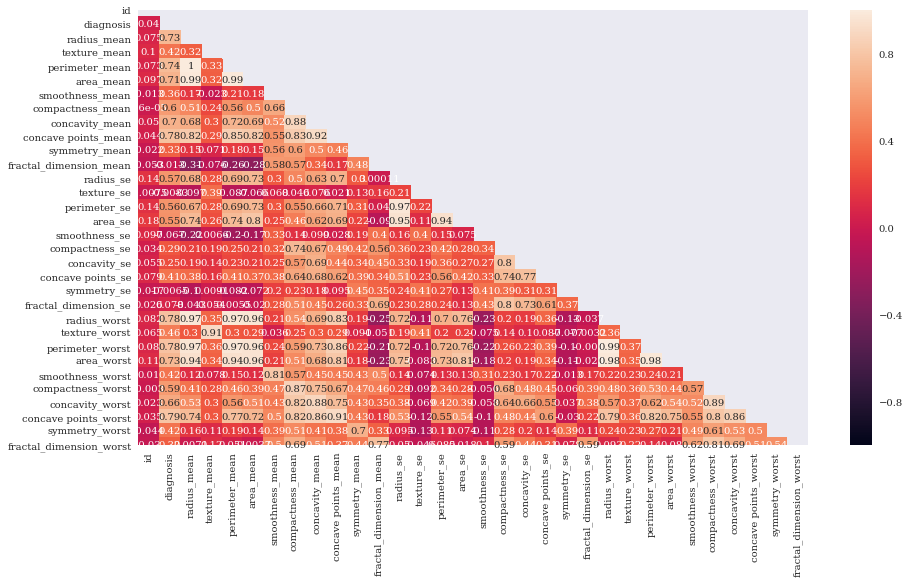

In [5]:
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(15,8))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True)

In [115]:
Xc = cancer[cancer.columns[[10,12,19,23,24,26,29,30]]]
print(Xc)

     symmetry_mean  radius_se  concave points_se  texture_worst  \
0           0.2419     1.0950            0.01587          17.33   
1           0.1812     0.5435            0.01340          23.41   
2           0.2069     0.7456            0.02058          25.53   
3           0.2597     0.4956            0.01867          26.50   
4           0.1809     0.7572            0.01885          16.67   
..             ...        ...                ...            ...   
564         0.1726     1.1760            0.02454          26.40   
565         0.1752     0.7655            0.01678          38.25   
566         0.1590     0.4564            0.01557          34.12   
567         0.2397     0.7260            0.01664          39.42   
568         0.1587     0.3857            0.00000          30.37   

     perimeter_worst  smoothness_worst  concave points_worst  symmetry_worst  
0             184.60           0.16220                0.2654          0.4601  
1             158.80           0.1238

In [7]:
Xdf = pd.DataFrame(Xc)
Xdf["dignosis"] = y
Xdf.corr()

,symmetry_mean,radius_se,concave points_se,texture_worst,perimeter_worst,smoothness_worst,concave points_worst,symmetry_worst,dignosis
symmetry_mean,1.000000,0.303379,0.393298,0.090651,0.219169,0.426675,0.430297,0.699826,0.330499
radius_se,0.303379,1.000000,0.513346,0.194799,0.719684,0.141919,0.531062,0.094543,0.567134
concave points_se,0.393298,0.513346,1.000000,0.086741,0.394999,0.215351,0.602450,0.143116,0.408042
texture_worst,0.090651,0.194799,0.086741,1.000000,0.365098,0.225429,0.359755,0.233027,0.456903
perimeter_worst,0.219169,0.719684,0.394999,0.365098,1.000000,0.236775,0.816322,0.269493,0.782914
smoothness_worst,0.426675,0.141919,0.215351,0.225429,0.236775,1.000000,0.547691,0.493838,0.421465
concave points_worst,0.430297,0.531062,0.602450,0.359755,0.816322,0.547691,1.000000,0.502528,0.793566
symmetry_worst,0.699826,0.094543,0.143116,0.233027,0.269493,0.493838,0.502528,1.000000,0.416294
dignosis,0.330499,0.567134,0.408042,0.456903,0.782914,0.421465,0.793566,0.416294,1.000000


In [116]:
display(Xdf)

,symmetry_mean,radius_se,concave points_se,texture_worst,perimeter_worst,smoothness_worst,concave points_worst,symmetry_worst,dignosis
0,0.2419,1.0950,0.01587,17.33,184.60,0.16220,0.2654,0.4601,1
1,0.1812,0.5435,0.01340,23.41,158.80,0.12380,0.1860,0.2750,1
2,0.2069,0.7456,0.02058,25.53,152.50,0.14440,0.2430,0.3613,1
3,0.2597,0.4956,0.01867,26.50,98.87,0.20980,0.2575,0.6638,1
4,0.1809,0.7572,0.01885,16.67,152.20,0.13740,0.1625,0.2364,1
...,...,...,...,...,...,...,...,...,...
564,0.1726,1.1760,0.02454,26.40,166.10,0.14100,0.2216,0.2060,1
565,0.1752,0.7655,0.01678,38.25,155.00,0.11660,0.1628,0.2572,1
566,0.1590,0.4564,0.01557,34.12,126.70,0.11390,0.1418,0.2218,1
567,0.2397,0.7260,0.01664,39.42,184.60,0.16500,0.2650,0.4087,1


In [119]:
n = len(y)
np.random.seed(919)
Xc_train, Xc_test, y_train, y_test = train_test_split(Xc, y, test_size=0.2)

scaler = Normalizer()
scaler.fit(Xc_train)
Xc_train = scaler.transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

# EXERCISE 1. STOCHASTIC GRADIENT DESCENT

### OLS

In [10]:
# 0. parameters with simple linear regression ols 
beta_linreg = np.linalg.inv(X5_train.T.dot(X5_train)) @ (X5_train.T) @ (z_train)
zpred_lin = X5_test @ beta_linreg
mse_ols = np.stack(((MSE(z_test, zpred_lin)).round(5), "-", "-", "-", "-", "-", "OLS Reg"), axis = -1)
mse_ols = pd.DataFrame(mse_ols)   
mse_ols = mse_ols.T
mse_ols.columns = ["MSE", "Learning Rate", "Epochs", "Mini-Batches Size", "Decay", "Alpha", "Model"]
display(mse_ols)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Model
0,0.07513,-,-,-,-,-,OLS Reg


In [11]:
# Let's initialize the needed parameters
n_tr = len(X5_train)
features = X5_train.shape[1]
etas = np.logspace(-5, -1, 5)

epochs = 100
M = 8
m = int(n_tr/M) #738

In [12]:
# parameters with sgd: ols in function of a learning rate and a decay factor following a Time-Based Learning Rate Schedule

decay = np.logspace(-4, -1, 4)
min_mse_sgd1 = float("inf")

for dec in decay: 
    for eta in etas:
        eta_dec = eta
        np.random.seed(198)
        theta = np.random.randn(features,1)
        for epoch in range(epochs):
            chunk = 0
            for i in range(m):
                chunkrows = range(chunk, chunk+M)
                xi = X5_train[chunkrows] 
                zi = z_train[chunkrows]
                gradient = (2.0/M) * xi.T @ ((xi @ theta) - zi)
                theta -= eta_dec*gradient
                chunk += M
            eta_dec = eta_dec * 1/(1 + dec * epoch)
            zpred_sgd = X5_test @ theta
            estimated_mse = MSE(z_test, zpred_sgd)
            if  estimated_mse < min_mse_sgd1:
                min_mse_sgd1 = estimated_mse
                best_eta_sgd1 = eta
                best_decay = dec
                zpred_sgd1 = zpred_sgd
                
print("Best MSE = ", min_mse_sgd1)
print("Best eta = ", best_eta_sgd1)
print("Best decay = ", best_decay)

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul


Best MSE =  0.07607635341677133
Best eta =  0.01
Best decay =  0.001


In [13]:
mse_ols.loc[1] = [min_mse_sgd1.round(5), best_eta_sgd1, epochs, M, "Time-Based", "-", "SGD"]
display(mse_ols)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Model
0,0.07513,-,-,-,-,-,OLS Reg
1,0.07608,0.01,100,8,Time-Based,-,SGD


In [14]:
# parameters with sgd: ols in function of a learning rate and a decay factor following a Drop-Based Learning Rate Schedule

epoch_drop = 20
drop = np.arange(0.1, 0.6, 0.1)

min_mse_sgd2 = float("inf")
for eta in etas:
    eta_dec = eta
    np.random.seed(198)
    theta = np.random.randn(features, 1)
    for dr in drop:
        for epoch in range(epochs):
            chunk = 0
            for i in range(m):
                chunkrows = range(chunk, chunk+M)
                xi = X5_train[chunkrows] 
                zi = z_train[chunkrows]
                gradient = (2.0/M) * xi.T @ ((xi @ theta) - zi)
                theta -= eta_dec*gradient
                chunk += M
            eta_dec = eta*dr**floor(epoch/epoch_drop)
            zpred_sgd = X5_test @ theta
            estimated_mse = MSE(z_test, zpred_sgd)
            if estimated_mse < min_mse_sgd2:
                min_mse_sgd2 = estimated_mse
                best_eta_sgd2 = eta
                best_drop = dr
                zpred_sgd2 = zpred_sgd

print("Best MSE = ", min_mse_sgd2)
print("Best eta = ", best_eta_sgd2)
print("Best drop = ", best_drop)

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in matmul


Best MSE =  0.07589015224692852
Best eta =  0.01
Best drop =  0.30000000000000004


In [15]:
mse_ols.loc[2] = [min_mse_sgd2.round(5), best_eta_sgd2, epochs, M, "Drop-Based", "-", "SGD"]
display(mse_ols)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Model
0,0.07513,-,-,-,-,-,OLS Reg
1,0.07608,0.01,100,8,Time-Based,-,SGD
2,0.07589,0.01,100,8,Drop-Based,-,SGD


In [16]:
# parameters with sgd: ols in function of a learning rate and number of mini-batches (Drop-Based decay)

d = 0.3
Mnew = np.array((16, 32, 64))
mini_b = np.zeros(len(Mnew))
for b in range(len(mini_b)):
    mini_b[b] = int(n_tr/Mnew[b])
    mini_b = mini_b.astype(int)

min_mse_sgd3 = float("inf")
for j, mb in enumerate(mini_b): 
    for eta in etas:
        eta_dec = eta
        np.random.seed(198)
        theta = np.random.randn(features,1)
        for epoch in range(epochs):
            chunk = 0
            for i in range(mb):
                chunkrows = range(chunk, chunk+Mnew[j])
                xi = X5_train[chunkrows] 
                zi = z_train[chunkrows]
                gradient = (2.0/Mnew[j]) * xi.T @ ((xi @ theta) - zi)
                theta -= eta_dec*gradient
                chunk += Mnew[j]
            eta_dec = eta*d**floor(epoch/epoch_drop)
            zpred_sgd = X5_test @ theta
            estimated_mse = MSE(z_test, zpred_sgd)
            if estimated_mse < min_mse_sgd3:
                min_mse_sgd3 = estimated_mse
                best_eta_sgd3 = eta
                best_batches = Mnew[j]
                zpred_sgd3 = zpred_sgd
                              
print("Best MSE = ", min_mse_sgd3)
print("Best eta = ", best_eta_sgd3)
print("Best mini-batches size = ", best_batches)

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in matmul


Best MSE =  0.07747072522867864
Best eta =  0.01
Best mini-batches size =  16


In [17]:
mse_ols.loc[3] = [min_mse_sgd3.round(5), best_eta_sgd3, epochs, best_batches, "Drop-Based", "-", "SGD"]
display(mse_ols)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Model
0,0.07513,-,-,-,-,-,OLS Reg
1,0.07608,0.01,100,8,Time-Based,-,SGD
2,0.07589,0.01,100,8,Drop-Based,-,SGD
3,0.07747,0.01,100,16,Drop-Based,-,SGD


In [18]:
# parameters with sgd: ols in function of a learning rate and number of epochs (Drop-Based decay)

epoch_vals = np.arange(100, 501, 100)    
min_mse_sgd4 = float("inf")

for e in epoch_vals: 
    epoch_drop = e/5
    for eta in etas:
        eta_dec = eta
        np.random.seed(198)
        theta = np.random.randn(features, 1)
        for epoch in range(e):
            chunk = 0
            for i in range(m):
                chunkrows = range(chunk, chunk + M)
                xi = X5_train[chunkrows] 
                zi = z_train[chunkrows]
                gradient = (2.0/M) * xi.T @ ((xi @ theta) - zi)
                theta -= eta_dec*gradient
                chunk += M
            eta_dec = eta * d**floor(epoch/epoch_drop)
            zpred_sgd = X5_test @ theta
            estimated_mse = MSE(z_test, zpred_sgd)
            if estimated_mse < min_mse_sgd4:
                best_eta_sgd4 = eta
                min_mse_sgd4 = estimated_mse
                best_epochs = e
                zpred_sgd4 = zpred_sgd
                
print("Best MSE = ", min_mse_sgd4)
print("Best eta = ", best_eta_sgd4)
print("Best number of epochs = ", best_epochs)

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in matmul


Best MSE =  0.07587054296520881
Best eta =  0.01
Best number of epochs =  400


In [19]:
mse_ols.loc[4] = [min_mse_sgd4.round(5), best_eta_sgd4, best_epochs, M, "Drop-Based", "-", "SGD"]
display(mse_ols)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Model
0,0.07513,-,-,-,-,-,OLS Reg
1,0.07608,0.01,100,8,Time-Based,-,SGD
2,0.07589,0.01,100,8,Drop-Based,-,SGD
3,0.07747,0.01,100,16,Drop-Based,-,SGD
4,0.07587,0.01,400,8,Drop-Based,-,SGD


The best model is the one obtained with the simple OLS regression

### RIDGE

In [20]:
# parameters with simple ridge regression

I = np.eye(features, features)
lambdas = np.logspace(-4, 1, 6)
mse = np.zeros(len(lambdas))

min_mse_r = float("inf")
for i, lmb in enumerate(lambdas):
    beta_r = np.linalg.inv(X5_train.T.dot(X5_train)+lmb*I).dot(X5_train.T).dot(z_train)
    zpred_r = X5_test @ beta_r
    mse[i] = MSE(z_test, zpred_r)
    if mse[i] < min_mse_r:
        bestlambda = lmb
        min_mse_r = mse[i]
        zpred_ridge = zpred_r

mse_ridge = np.stack((min_mse_r.round(5), "-", "-", "-", "-", "-", bestlambda, "Ridge Reg"), axis = -1)
mse_ridge = pd.DataFrame(mse_ridge)   
mse_ridge = mse_ridge.T
mse_ridge.columns = ["MSE", "Learning Rate", "Epochs", "Mini-Batches Size", "Decay", "Alpha", "Lambda", "Model"]
display(mse_ridge)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Lambda,Model
0,0.07323,-,-,-,-,-,0.001,Ridge Reg


In [21]:
# parameters with sgd: ridge in function of a learning rate and decay factor following a Time-Based Learning Rate Schedule

min_mse_sgd5 = float("inf")

for lmb in lambdas:
    for dec in decay: 
        for eta in etas:
            eta_dec = eta
            np.random.seed(198)
            theta = np.random.randn(features,1)
            for epoch in range(epochs):
                chunk = 0
                for i in range(m):
                    chunkrows = range(chunk, chunk+M)
                    xi = X5_train[chunkrows] 
                    zi = z_train[chunkrows]
                    gradient = (2.0/M) * xi.T @ (xi @ (theta) - zi) + 2*lmb*theta
                    theta -= eta_dec*gradient
                    chunk += M
                eta_dec = eta_dec * 1/(1 + dec * epoch)
                zpred_sgd = X5_test @ theta
                estimated_mse = MSE(z_test, zpred_sgd)
                if  estimated_mse < min_mse_sgd5:
                    best_eta_sgd5 = eta
                    min_mse_sgd5 = estimated_mse
                    best_decay_r = dec 
                    best_lambda_sgd5 = lmb
                    zpred_sgd5 = zpred_sgd
                    
print("Best MSE = ", min_mse_sgd5)
print("Best eta = ", best_eta_sgd5)
print("Best decay = ", best_decay_r)
print("Best lambda = ", best_lambda_sgd5)

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in add
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in multiply


Best MSE =  0.07610438530507808
Best eta =  0.01
Best decay =  0.001
Best lambda =  0.0001


In [22]:
mse_ridge.loc[1] = [min_mse_sgd5.round(5), best_eta_sgd5, epochs, M, "Time-Based", "-", best_lambda_sgd5, "SGD"]
display(mse_ridge)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Lambda,Model
0,0.07323,-,-,-,-,-,0.001,Ridge Reg
1,0.0761,0.01,100,8,Time-Based,-,0.0001,SGD


In [23]:
# parameters with sgd: ridge in function of a learning rate and a decay factor following a Drop-Based Learning Rate Schedule

min_mse_sgd6 = float("inf")
for lmb in lambdas:
    for eta in etas:
        eta_dec = eta
        np.random.seed(198)
        theta = np.random.randn(features, 1)
        for dr_l in drop: 
            for epoch in range(epochs):
                chunk = 0
                for i in range(m):
                    chunkrows = range(chunk, chunk+M)
                    xi = X5_train[chunkrows] 
                    zi = z_train[chunkrows]
                    gradient = (2.0/M) * xi.T @ (xi @ (theta) - zi) + 2*lmb*theta
                    theta -= eta_dec*gradient
                    chunk += M
                eta_dec = eta*dr_l**floor(epoch/epoch_drop)
                zpred_sgd = X5_test @ theta
                estimated_mse = MSE(z_test, zpred_sgd)
                if  estimated_mse < min_mse_sgd6:
                    best_eta_sgd6 = eta
                    min_mse_sgd6 = estimated_mse
                    best_drop_r = dr_l
                    best_lambda_sgd6 = lmb
                    zpred_sgd6 = zpred_sgd
                    
print("Best MSE = ", min_mse_sgd6)
print("Best eta = ", best_eta_sgd6)
print("Best drop = ", best_drop_r)
print("Best lambda = ", best_lambda_sgd6)

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in matmul
  app.launch_new_instance()
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in matmul
  app.launch_new_instance()
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in add
  app.launch_new_instance()
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()


Best MSE =  0.07607172846581002
Best eta =  0.001
Best drop =  0.5
Best lambda =  0.0001


In [24]:
mse_ridge.loc[2] = [min_mse_sgd6.round(5), best_eta_sgd6, epochs, M, "Drop-Based", "-", best_lambda_sgd6, "SGD"]
display(mse_ridge)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Lambda,Model
0,0.07323,-,-,-,-,-,0.001,Ridge Reg
1,0.0761,0.01,100,8,Time-Based,-,0.0001,SGD
2,0.07607,0.001,100,8,Drop-Based,-,0.0001,SGD


In [25]:
# parameters with sgd: ridge in function of a learning rate and number of mini-batches (Drop-Based decay)

d_l = 0.5
min_mse_sgd7 = float("inf")

for lmb in lambdas:
    for j, mb in enumerate(mini_b): 
        for eta in etas:
            eta_dec = eta
            np.random.seed(198)
            theta = np.random.randn(features, 1) 
            for epoch in range(epochs):
                chunk = 0
                for i in range(mb):
                    chunkrows = range(chunk, chunk+Mnew[j])
                    xi = X5_train[chunkrows] 
                    zi = z_train[chunkrows]
                    gradient = (2.0/Mnew[j]) * xi.T @ (xi @ (theta) - zi) + 2*lmb*theta
                    theta -= eta_dec*gradient
                    chunk += Mnew[j]
                eta_dec = eta*d_l**floor(epoch/epoch_drop)
                zpred_sgd = X5_test @ theta
                estimated_mse = MSE(z_test, zpred_sgd)
                if  estimated_mse < min_mse_sgd7:
                    best_eta_sgd7 = eta
                    min_mse_sgd7 = estimated_mse
                    best_batches = Mnew[j]
                    best_lambda_sgd7 = lmb
                    zpred_sgd7 = zpred_sgd
                               
print("Best MSE = ", min_mse_sgd7)
print("Best eta = ", best_eta_sgd7)
print("Best mini-batches size = ", best_batches)
print("Best lambda = ", best_lambda_sgd7)

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in add
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in multiply


Best MSE =  0.07774453486070182
Best eta =  0.01
Best mini-batches size =  32
Best lambda =  0.0001


In [26]:
mse_ridge.loc[3] = [min_mse_sgd7.round(5), best_eta_sgd7, epochs, best_batches, "Drop-Based", "-", best_lambda_sgd7, "SGD"]
display(mse_ridge)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Lambda,Model
0,0.07323,-,-,-,-,-,0.001,Ridge Reg
1,0.0761,0.01,100,8,Time-Based,-,0.0001,SGD
2,0.07607,0.001,100,8,Drop-Based,-,0.0001,SGD
3,0.07774,0.01,100,32,Drop-Based,-,0.0001,SGD


In [27]:
# parameters with sgd: ridge in function of a learning rate and number of epochs (Drop-Based decay)
    
min_mse_sgd8 = float("inf")
for lmb in lambdas:
     for e in epoch_vals: 
        epoch_drop = e/5
        for eta in etas:
            eta_dec = eta
            np.random.seed(198)
            theta = np.random.randn(features, 1) 
            for epoch in range(e):
                chunk = 0
                for i in range(m):
                    chunkrows = range(chunk, chunk+M)
                    xi = X5_train[chunkrows] 
                    zi = z_train[chunkrows]
                    gradient = (2.0/M) * xi.T @ (xi @ (theta) - zi) + 2*lmb*theta
                    theta -= eta_dec*gradient
                    chunk += M
                eta_dec = eta*d_l**floor(epoch/epoch_drop)
                zpred_sgd = X5_test @ theta
                estimated_mse = MSE(z_test, zpred_sgd)
                if  estimated_mse < min_mse_sgd8:
                    best_eta_sgd8 = eta
                    min_mse_sgd8 = estimated_mse
                    best_epochs = e
                    best_lambda_sgd8 = lmb
                    zpred_sgd8 = zpred_sgd
                    
print("Best MSE = ", min_mse_sgd8)
print("Best eta = ", best_eta_sgd8)
print("Best number of epochs = ", best_epochs)
print("Best lambda = ", best_lambda_sgd8)

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in add
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in multiply


Best MSE =  0.07585235797934166
Best eta =  0.01
Best number of epochs =  500
Best lambda =  0.0001


In [28]:
mse_ridge.loc[4] = [min_mse_sgd8.round(5), best_eta_sgd8, best_epochs, M, "Drop-Based", "-", best_lambda_sgd8, "SGD"]
display(mse_ridge)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Lambda,Model
0,0.07323,-,-,-,-,-,0.001,Ridge Reg
1,0.0761,0.01,100,8,Time-Based,-,0.0001,SGD
2,0.07607,0.001,100,8,Drop-Based,-,0.0001,SGD
3,0.07774,0.01,100,32,Drop-Based,-,0.0001,SGD
4,0.07585,0.01,500,8,Drop-Based,-,0.0001,SGD


## MOMENTUM SGD

### OLS


In [29]:
# parameters with momentum sgd: ols in function of a learning rate and momentum parameter

alphas = np.logspace(-3, -1, 3)
min_mse_sgd9 = float("inf")

for alpha in alphas:
    for eta in etas:
        np.random.seed(198)
        theta = np.random.randn(features,1)
        v = np.random.randn(features,1)
        for epoch in range(epochs):
            chunk = 0
            for i in range(m):
                chunkrows = range(chunk, chunk+M)
                xi = X5_train[chunkrows] 
                zi = z_train[chunkrows]
                gradient = (2.0/M) * xi.T @ ((xi @ theta) - zi)
                v = alpha * v - eta * gradient
                theta += v
                chunk += M
            zpred_sgd = X5_test @ theta
            estimated_mse = MSE(z_test, zpred_sgd)
            if  estimated_mse < min_mse_sgd9:
                best_eta_sgd9 = eta
                min_mse_sgd9 = estimated_mse 
                best_alpha_sgd9 = alpha
                zpred_sgd9 = zpred_sgd
                
print("Best MSE = ", min_mse_sgd9)
print("Best eta = ", best_eta_sgd9)
print("Best alpha = ", best_alpha_sgd9)

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul


Best MSE =  0.07935509522304872
Best eta =  0.001
Best alpha =  0.1


In [30]:
mse_ols.loc[5] = [min_mse_sgd9.round(5), best_eta_sgd9, epochs, M, "Momentum", best_alpha_sgd9, "MSGD"]
display(mse_ols)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Model
0,0.07513,-,-,-,-,-,OLS Reg
1,0.07608,0.01,100,8,Time-Based,-,SGD
2,0.07589,0.01,100,8,Drop-Based,-,SGD
3,0.07747,0.01,100,16,Drop-Based,-,SGD
4,0.07587,0.01,400,8,Drop-Based,-,SGD
5,0.07936,0.001,100,8,Momentum,0.1,MSGD


In [31]:
# parameters with momentum sgd: ols in function of a learning rate, number of mini-batches and alpha

min_mse_sgd10 = float("inf")
for alpha in alphas:
    for j, mb in enumerate(mini_b):
        for eta in etas:
            np.random.seed(198)
            theta = np.random.randn(features,1)
            v = np.random.randn(features,1)
            for epoch in range(epochs):
                chunk = 0
                for i in range(mb):
                    chunkrows = range(chunk, chunk+Mnew[j])
                    xi = X5_train[chunkrows] 
                    zi = z_train[chunkrows]
                    gradient = (2.0/Mnew[j]) * xi.T @ ((xi @ theta) - zi)
                    v = alpha * v - eta * gradient
                    theta += v
                    chunk += Mnew[j]
                zpred_sgd = X5_test @ theta
                estimated_mse = MSE(z_test, zpred_sgd)
                if  estimated_mse < min_mse_sgd10:
                    best_eta_sgd10 = eta
                    min_mse_sgd10 = estimated_mse
                    best_batches = Mnew[j]
                    best_alpha_sgd10 = alpha
                    zpred_sgd10 = zpred_sgd
                    
print("Best MSE = ", min_mse_sgd10)
print("Best eta = ", best_eta_sgd10)
print("Best alpha = ", best_alpha_sgd10)
print("Best mini-batches size = ", best_batches)

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in matmul
  app.launch_new_instance()
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in matmul
  app.launch_new_instance()


Best MSE =  0.07767755614647262
Best eta =  0.01
Best alpha =  0.001
Best mini-batches size =  32


In [32]:
mse_ols.loc[6] = [min_mse_sgd10.round(5), best_eta_sgd10, epochs, best_batches, "Momentum", best_alpha_sgd10, "MSGD"]
display(mse_ols)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Model
0,0.07513,-,-,-,-,-,OLS Reg
1,0.07608,0.01,100,8,Time-Based,-,SGD
2,0.07589,0.01,100,8,Drop-Based,-,SGD
3,0.07747,0.01,100,16,Drop-Based,-,SGD
4,0.07587,0.01,400,8,Drop-Based,-,SGD
5,0.07936,0.001,100,8,Momentum,0.1,MSGD
6,0.07768,0.01,100,32,Momentum,0.001,MSGD


In [33]:
# parameters with momentum sgd: ols in function of a learning rate, alpha and number of epochs

M32 = 32
m32 = int(n_tr/M32)
min_mse_sgd11 = float("inf")

for alpha in alphas:
     for e in epoch_vals:
        for eta in etas:
            np.random.seed(198)
            theta = np.random.randn(features, 1) 
            v = np.random.randn(features,1)
            for epoch in range(epochs):
                chunk = 0
                for i in range(m32):
                    chunkrows = range(chunk, chunk+M32)
                    xi = X5_train[chunkrows] 
                    zi = z_train[chunkrows]
                    gradient = (2.0/M32) * xi.T @ ((xi @ theta) - zi)
                    v = alpha * v - eta * gradient
                    theta += v
                    chunk += M32
                zpred_sgd = X5_test @ theta
                estimated_mse = MSE(z_test, zpred_sgd)
                if  estimated_mse < min_mse_sgd11:
                    best_eta_sgd11 = eta
                    min_mse_sgd11 = estimated_mse
                    best_epochs = e
                    best_alpha_sgd11 = alpha
                    zpred_sgd11 = zpred_sgd
                    
print("Best MSE = ", min_mse_sgd11)
print("Best eta = ", best_eta_sgd11)
print("Best number of epochs = ", best_epochs)
print("Best alpha = ", best_alpha_sgd11)

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in matmul


Best MSE =  0.07767755614647262
Best eta =  0.01
Best number of epochs =  100
Best alpha =  0.001


It chooses the model with 100 epochs, which is exactly what we have already calculated earlier (index = 6)

In [34]:
display(mse_ols)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Model
0,0.07513,-,-,-,-,-,OLS Reg
1,0.07608,0.01,100,8,Time-Based,-,SGD
2,0.07589,0.01,100,8,Drop-Based,-,SGD
3,0.07747,0.01,100,16,Drop-Based,-,SGD
4,0.07587,0.01,400,8,Drop-Based,-,SGD
5,0.07936,0.001,100,8,Momentum,0.1,MSGD
6,0.07768,0.01,100,32,Momentum,0.001,MSGD


The best stochastic gradient descent model is the one with a $MSE$ of 0.07587: 
 - $\eta$ = 0.01
 - 400 epochs
 - 8 observations in each mini-batch
 - Drop-Base decay (d=0.3)  

However, the model with the same parameters, but just with 100 epochs gives a $MSE$ very similar (0.07589), so from a computational point of view, it can be better to use this second model, since the improvement is not very significant. In fact, if we approximate to four digits, the error has the same value: 0.0759.

### RIDGE

In [36]:
# parameters with momentum sgd: ridge in function of a learning rate and momentum parameter alpha

min_mse_sgd12 = float("inf")

for alpha in alphas:
    for lmb in lambdas: 
        for eta in etas:
            np.random.seed(198)
            theta = np.random.randn(features,1)
            v = np.random.randn(features,1)
            for epoch in range(epochs):
                chunk = 0
                for i in range(m):
                    chunkrows = range(chunk, chunk+M)
                    xi = X5_train[chunkrows] 
                    zi = z_train[chunkrows]
                    gradient = (2.0/M) * xi.T @ ((xi @ theta) - zi) + 2*lmb*theta
                    v = alpha * v - eta * gradient
                    theta += v
                    chunk += M
                zpred_sgd = X5_test @ theta
                estimated_mse = MSE(z_test, zpred_sgd)
                if  estimated_mse < min_mse_sgd12:
                    best_eta_sgd12 = eta
                    min_mse_sgd12 = estimated_mse 
                    best_alpha_sgd12 = alpha
                    best_lambda_sgd12 = lmb
                    zpred_sgd12 = zpred_sgd
                    
print("Best MSE = ", min_mse_sgd12)
print("Best eta = ", best_eta_sgd12)
print("Best alpha = ", best_alpha_sgd12)
print("Best lambda = ", best_lambda_sgd12)

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in multiply
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in add


Best MSE =  0.07939693499248217
Best eta =  0.001
Best alpha =  0.1
Best lambda =  0.0001


In [37]:
mse_ridge.loc[5] = [min_mse_sgd12.round(5), best_eta_sgd12, epochs, M, "Momentum", best_alpha_sgd12, best_lambda_sgd12, "MSGD"]
display(mse_ridge)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Lambda,Model
0,0.07323,-,-,-,-,-,0.001,Ridge Reg
1,0.0761,0.01,100,8,Time-Based,-,0.0001,SGD
2,0.07607,0.001,100,8,Drop-Based,-,0.0001,SGD
3,0.07774,0.01,100,32,Drop-Based,-,0.0001,SGD
4,0.07585,0.01,500,8,Drop-Based,-,0.0001,SGD
5,0.0794,0.001,100,8,Momentum,0.1,0.0001,MSGD


In [38]:
# parameters with momentum sgd: ridge in function of a learning rate, number of mini-batches and alpha

min_mse_sgd13 = float("inf")

for alpha in alphas:
    for lmb in lambdas: 
        for j, mb in enumerate(mini_b):
            for eta in etas:
                np.random.seed(198)
                theta = np.random.randn(features,1)
                v = np.random.randn(features,1)
                for epoch in range(epochs):
                    chunk = 0
                    for i in range(mb):
                        chunkrows = range(chunk, chunk+Mnew[j])
                        xi = X5_train[chunkrows] 
                        zi = z_train[chunkrows]
                        gradient = (2.0/Mnew[j]) * xi.T @ ((xi @ theta) - zi) + 2*lmb*theta
                        v = alpha * v - eta * gradient
                        theta += v
                        chunk += Mnew[j]
                    zpred_sgd = X5_test @ theta
                    estimated_mse = MSE(z_test, zpred_sgd)
                    if  estimated_mse < min_mse_sgd13:
                        best_eta_sgd13 = eta
                        min_mse_sgd13 = estimated_mse 
                        best_alpha_sgd13 = alpha
                        best_lambda_sgd13 = lmb
                        best_batches = Mnew[j]
                        zpred_sgd13 = zpred_sgd
                    
print("Best MSE = ", min_mse_sgd13)
print("Best eta = ", best_eta_sgd13)
print("Best alpha = ", best_alpha_sgd13)
print("Best lambda = ", best_lambda_sgd13)
print("Best mini-batches size = ", best_batches)

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in multiply
C:\Users\isabe\Anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Best MSE =  0.07774537017197393
Best eta =  0.01
Best alpha =  0.001
Best lambda =  0.0001
Best mini-batches size =  32


In [39]:
mse_ridge.loc[6] = [min_mse_sgd13.round(5), best_eta_sgd13, epochs, best_batches, "Momentum", best_alpha_sgd13, 
                    best_lambda_sgd13, "MSGD"]
display(mse_ridge)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Lambda,Model
0,0.07323,-,-,-,-,-,0.001,Ridge Reg
1,0.0761,0.01,100,8,Time-Based,-,0.0001,SGD
2,0.07607,0.001,100,8,Drop-Based,-,0.0001,SGD
3,0.07774,0.01,100,32,Drop-Based,-,0.0001,SGD
4,0.07585,0.01,500,8,Drop-Based,-,0.0001,SGD
5,0.0794,0.001,100,8,Momentum,0.1,0.0001,MSGD
6,0.07775,0.01,100,32,Momentum,0.001,0.0001,MSGD


In [40]:
# parameters with momentum sgd: ridge in function of a learning rate, number of epochs and alpha

min_mse_sgd14 = float("inf")
for alpha in alphas:
    for lmb in lambdas: 
        for e in epoch_vals:
            for eta in etas:
                np.random.seed(198)
                theta = np.random.randn(features, 1) 
                v = np.random.randn(features,1)
                for epoch in range(epochs):
                    chunk = 0
                    for i in range(m32):
                        chunkrows = range(chunk, chunk+M32)
                        xi = X5_train[chunkrows] 
                        zi = z_train[chunkrows]
                        gradient = (2.0/M32) * xi.T @ ((xi @ theta) - zi) + 2*lmb*theta
                        v = alpha * v - eta * gradient
                        theta += v
                        chunk += M32
                    zpred_sgd = X5_test @ theta
                    estimated_mse = MSE(z_test, zpred_sgd)
                    if  estimated_mse < min_mse_sgd14:
                        best_eta_sgd14 = eta
                        min_mse_sgd14 = estimated_mse
                        best_epochs = e
                        best_alpha_sgd14 = alpha
                        best_lambda_sgd14 = lmb
                        zpred_sgd14 = zpred_sgd
                    
print("Best MSE = ", min_mse_sgd14)
print("Best eta = ", best_eta_sgd14)
print("Best number of epochs = ", best_epochs)
print("Best alpha = ", best_alpha_sgd14)
print("Best lambda = ", best_lambda_sgd14)

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in multiply


Best MSE =  0.07774537017197393
Best eta =  0.01
Best number of epochs =  100
Best alpha =  0.001
Best lambda =  0.0001


It chooses the model with 100 epochs, which is exactly what we have already calculated earlier (index = 6)

In [41]:
display(mse_ridge)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Decay,Alpha,Lambda,Model
0,0.07323,-,-,-,-,-,0.001,Ridge Reg
1,0.0761,0.01,100,8,Time-Based,-,0.0001,SGD
2,0.07607,0.001,100,8,Drop-Based,-,0.0001,SGD
3,0.07774,0.01,100,32,Drop-Based,-,0.0001,SGD
4,0.07585,0.01,500,8,Drop-Based,-,0.0001,SGD
5,0.0794,0.001,100,8,Momentum,0.1,0.0001,MSGD
6,0.07775,0.01,100,32,Momentum,0.001,0.0001,MSGD


The best stochastic gradient descent model is the one with a $MSE$ of 0.07585: 
 - $\eta$ = 0.01
 - 500 epochs
 - 8 observations in each mini-batch
 - Drop-Base decay (d=0.5)  
 - $\lambda$ = 0.0001

However, the best model is the one with simple ridge regression and and a $\lambda$ value of 0.001, with an error of 0.07323. It is also better than the model with simple OLS ($MSE$ = 0.07513).

# EXERCISE 2. NEURAL NETWORKS

In [124]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def grad_sigmoid(x): #with x being the output of a sigmoid function
    return x*(1-x)

def relu(x):
    r = np.maximum(0, x)
    return r

def grad_relu(x): #with x being the same input as in relu
    r = np.zeros((x.shape[0], x.shape[1]))
    r[x<=0] = 0
    r[x>0] = 1
    return r

def leaky_relu(x):
    alpha = 0.1
    lr = np.maximum(alpha*x, x)
    return lr

def grad_leaky_relu(x):   #with x being the same input as in leaky_relu
    lr = np.zeros((x.shape[0], x.shape[1]))
    lr[x<=0] = 0.01
    lr[x>0] = 1
    return lr

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

In [156]:
def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1
    return onehot_vector

y_train_onehot, y_test_onehot = to_categorical_numpy(y_train), to_categorical_numpy(y_test)

In [153]:
class NeuralNetwork:
    def __init__(self, X, y, n_hidden_neurons, n_categories, n_hidden_layers, epochs, batch_size, eta, lmb, activation, weight):

        self.X_full = X
        self.y_full = y

        self.n_inputs = X.shape[0]
        self.n_features = X.shape[1]
        self.n_hidden_neurons = n_hidden_neurons
        self.n_categories = n_categories
        self.n_hidden_layers = n_hidden_layers

        self.epochs = epochs
        self.batch_size = batch_size
        self.iterations = self.n_inputs // self.batch_size
        self.eta = eta
        self.lmb = lmb
        self.activation = activation
        self.weight = weight

        self.create_biases_and_weights()
        
    def create_biases_and_weights(self):
        self.w = []
        if self.weight == 0:
            self.w.append(np.zeros((self.n_features, self.n_hidden_neurons)))
            for i in range(1, self.n_hidden_layers):
                self.hidden_weights = np.zeros((self.n_hidden_neurons, self.n_hidden_neurons))
                self.w.append(self.hidden_weights)
            self.hidden_bias = np.zeros(self.n_hidden_neurons)
            self.output_weights = np.zeros((self.n_hidden_neurons, self.n_categories))
            self.output_bias = np.zeros(self.n_categories)
        else:
            self.w.append(np.random.randn(self.n_features, self.n_hidden_neurons))
            for i in range(1, self.n_hidden_layers):
                self.hidden_weights = np.random.randn(self.n_hidden_neurons, self.n_hidden_neurons)
                self.w.append(self.hidden_weights)
            self.hidden_bias = np.zeros(self.n_hidden_neurons) + 0.01
            self.output_weights = np.random.randn(self.n_hidden_neurons, self.n_categories)
            self.output_bias = np.zeros(self.n_categories) + 0.01
    

    def feed_forward(self):
        # feed-forward for training
        self.a = []
        self.z = []
        self.z_h = np.matmul(self.X, self.w[0]) + self.hidden_bias
        self.a_h = self.activation(self.z_h)
        self.a.append(self.a_h)
        self.z.append(self.z_h)
        
        for i in range(1, self.n_hidden_layers):
            self.z_h = np.matmul(self.a[i-1], self.w[i]) + self.hidden_bias
            self.a_h = self.activation(self.z_h)
            self.a.append(self.a_h)
            self.z.append(self.z_h)

        self.z_o = np.matmul(self.a[n_hidden_layers-1], self.output_weights) + self.output_bias
        
        if self.n_categories > 1:
            exp_term = np.exp(self.z_o)
            self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
        

    def feed_forward_out(self, X):
        # feed-forward for output
        a = []
        z = []
        z_h = np.matmul(X, self.w[0]) + self.hidden_bias
        a_h = self.activation(z_h)
        a.append(a_h)
        z.append(z_h)
        
        for i in range(1, self.n_hidden_layers):
            z_h = np.matmul(a_h, self.w[i]) + self.hidden_bias
            a_h = self.activation(z_h)
            a.append(a_h)
            z.append(z_h)

        z_o = np.matmul(a[n_hidden_layers-1], self.output_weights) + self.output_bias

        if self.n_categories > 1:
            exp_term = np.exp(z_o)
            probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
            return probabilities
        else:
            return z_o

    
    def backpropagation(self):
        
        if self.n_categories > 1:
            error_output = self.probabilities - self.y
        else:
            error_output = self.z_o - self.y
        
        self.a.reverse()
        self.z.reverse()
        self.w.reverse()
        self.err_h = []
        
        if self.activation == sigmoid:
            error_hidden = np.matmul(error_output, self.output_weights.T) * grad_sigmoid(self.a[0]) 
        elif self.activation == relu: 
            error_hidden = np.matmul(error_output, self.output_weights.T) * grad_relu(self.z[0]) 
        else:
            error_hidden = np.matmul(error_output, self.output_weights.T) * grad_leaky_relu(self.z[0]) 
        self.err_h.append(error_hidden)
        
        for i in range(1, self.n_hidden_layers):
            if self.activation == sigmoid:
                error_hidden = np.matmul(self.err_h[i-1], self.w[i-1].T) * grad_sigmoid(self.a[i]) 
                self.err_h.append(error_hidden)
            elif self.activation == relu: 
                error_hidden = np.matmul(self.err_h[i-1], self.w[i-1].T) * grad_relu(self.z[i]) 
                self.err_h.append(error_hidden)
            else:
                error_hidden = np.matmul(self.err_h[i-1], self.w[i-1].T) * grad_leaky_relu(self.z[i]) 
                self.err_h.append(error_hidden)
        
        self.output_weights_gradient = np.matmul(self.a[0].T, error_output)
        self.output_bias_gradient = np.sum(error_output, axis=0)
        
        self.g = []
        for i in range(1, self.n_hidden_layers):
            self.hidden_weights_gradient = np.matmul(self.a[i].T, self.err_h[i-1])
            self.g.append(self.hidden_weights_gradient)
            
        self.hidden_weights_gradient = np.matmul(self.X.T, self.err_h[-1])
        self.g.append(self.hidden_weights_gradient)
        self.hidden_bias_gradient = np.sum(error_hidden, axis=0)

        if self.lmb > 0.0:
            self.output_weights_gradient += self.lmb * self.output_weights
            for i in range(len(self.w)):
                self.g[i] += self.lmb * self.w[i]
        self.output_weights -= self.eta * self.output_weights_gradient
        self.output_bias -= self.eta * self.output_bias_gradient
        
        for i in range(len(self.w)):
            self.w[i] -= self.eta * self.g[i]
        self.hidden_bias -= self.eta * self.hidden_bias_gradient
       
        self.a.reverse()
        self.z.reverse()
        self.w.reverse()
        
    def predict(self, X):
        if self.n_categories > 1:
            probabilities = self.feed_forward_out(X)
            return np.argmax(probabilities, axis=1)
        else:
            values = self.feed_forward_out(X) 
            return values 

    def predict_probabilities(self, X):
        if self.n_categories > 1:
            probabilities = self.feed_forward_out(X)
            return probabilities
  
    def train(self):
        data_indices = np.arange(self.n_inputs)

        for i in range(self.epochs):
            for j in range(self.iterations):
                
                chosen_datapoints = np.random.choice(
                    data_indices, size=self.batch_size, replace=False)

                self.X = self.X_full[chosen_datapoints]
                self.y = self.y_full[chosen_datapoints]

                self.feed_forward()
                self.backpropagation() 

In [45]:
# setting up parameters and plot labels
n_categories=1
epochs_nn = 25
layers = np.array((1, 2, 3))                                 
x_labels = (lambdas)
y_labels = (etas)

In [46]:
# Neural Network with 1,2,3 hidden layers, 30 hidden nodes and sigmoid

n_hidden_neurons = 30
test_mse_nn1, test_mse_nn2, test_mse_nn3 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
min_mse_nn1, min_mse_nn2, min_mse_nn3 = float("inf"), float("inf") , float("inf") 

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = X5_train, y = z_train, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, epochs=epochs_nn, 
                               batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = sigmoid, weight=0.01)
            nn.train()
        
            z_predict = nn.predict(X5_test)
            if n_hidden_layers == 1:
                test_mse_nn1[i][j] = MSE(z_test, z_predict)
                if test_mse_nn1[i][j] < min_mse_nn1:
                    min_mse_nn1 = test_mse_nn1[i][j]
                    best_eta_nn1 = eta
                    best_lambda_nn1 = lmb
                    z_predict_nn1 = z_predict
           
            elif n_hidden_layers == 2:
                test_mse_nn2[i][j] = MSE(z_test, z_predict)
                if test_mse_nn2[i][j] < min_mse_nn2:
                    min_mse_nn2 = test_mse_nn2[i][j]
                    best_eta_nn2 = eta
                    best_lambda_nn2 = lmb
                    z_predict_nn2 = z_predict
            
            else:
                test_mse_nn3[i][j] = MSE(z_test, z_predict)
                if test_mse_nn3[i][j] < min_mse_nn3:
                    min_mse_nn3 = test_mse_nn3[i][j]
                    best_eta_nn3 = eta
                    best_lambda_nn3 = lmb
                    z_predict_nn3 = z_predict
                    

print("Best MSE 1 HL = ", min_mse_nn1)
print("Best eta 1 HL = ", best_eta_nn1)
print("Best lambda 1 HL= ", best_lambda_nn1)
print()
print("Best MSE 2 HL = ", min_mse_nn2)
print("Best eta 2 HL = ", best_eta_nn2)
print("Best lambda 2 HL= ", best_lambda_nn2)
print()
print("Best MSE 3 HL = ", min_mse_nn3)
print("Best eta 3 HL = ", best_eta_nn3)
print("Best lambda 3 HL= ", best_lambda_nn3)

C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in matmul
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in multiply


Best MSE 1 HL =  0.06059218852059015
Best eta 1 HL =  0.01
Best lambda 1 HL=  0.0001

Best MSE 2 HL =  0.0664984457575313
Best eta 2 HL =  0.001
Best lambda 2 HL=  0.0001

Best MSE 3 HL =  0.059631000876735014
Best eta 3 HL =  0.01
Best lambda 3 HL=  0.001


In [47]:
mse_nn = np.stack((min_mse_nn1.round(5), best_eta_nn1, epochs_nn, M, 1, n_hidden_neurons, best_lambda_nn1, "Sigmoid", "NN"), axis = -1)
mse_nn = pd.DataFrame(mse_nn)   
mse_nn = mse_nn.T
mse_nn.columns = ["MSE", "Learning Rate", "Epochs", "Mini-Batches Size", "Hidden Layers", "Hidden Neurons", 
                  "Regularization", "Activation", "Model"]

mse_nn.loc[1] = [min_mse_nn2.round(5), best_eta_nn2, epochs_nn, M, 2, n_hidden_neurons, best_lambda_nn2, "Sigmoid", "NN"]
mse_nn.loc[2] = [min_mse_nn3.round(5), best_eta_nn3, epochs_nn, M, 3, n_hidden_neurons, best_lambda_nn3, "Sigmoid", "NN"]
display(mse_nn)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,0.06059,0.01,25,8,1,30,0.0001,Sigmoid,NN
1,0.0665,0.001,25,8,2,30,0.0001,Sigmoid,NN
2,0.05963,0.01,25,8,3,30,0.001,Sigmoid,NN


In [49]:
# Neural Network with 1,2,3 hidden layers, 40 hidden nodes and sigmoid

n_hidden_neurons = 40
test_mse_nn4, test_mse_nn5, test_mse_nn6 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
min_mse_nn4, min_mse_nn5, min_mse_nn6 = float("inf"), float("inf") , float("inf") 

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = X5_train, y = z_train, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, epochs=epochs_nn, 
                               batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = sigmoid, weight=0.01)
            nn.train()
        
            z_predict = nn.predict(X5_test)
            if n_hidden_layers == 1:
                test_mse_nn4[i][j] = MSE(z_test, z_predict)
                if test_mse_nn4[i][j] < min_mse_nn4:
                    min_mse_nn4 = test_mse_nn4[i][j]
                    best_eta_nn4 = eta
                    best_lambda_nn4 = lmb
                    z_predict_nn4 = z_predict
           
            elif n_hidden_layers == 2:
                test_mse_nn5[i][j] = MSE(z_test, z_predict)
                if test_mse_nn5[i][j] < min_mse_nn5:
                    min_mse_nn5 = test_mse_nn5[i][j]
                    best_eta_nn5 = eta
                    best_lambda_nn5 = lmb
                    z_predict_nn5 = z_predict
            
            else:
                test_mse_nn6[i][j] = MSE(z_test, z_predict)
                if test_mse_nn6[i][j] < min_mse_nn6:
                    min_mse_nn6 = test_mse_nn6[i][j]
                    best_eta_nn6 = eta
                    best_lambda_nn6 = lmb
                    z_predict_nn6 = z_predict
                    

print("Best MSE 1 HL = ", min_mse_nn4)
print("Best eta 1 HL = ", best_eta_nn4)
print("Best lambda 1 HL= ", best_lambda_nn4)
print()
print("Best MSE 2 HL = ", min_mse_nn5)
print("Best eta 2 HL = ", best_eta_nn5)
print("Best lambda 2 HL= ", best_lambda_nn5)
print()
print("Best MSE 3 HL = ", min_mse_nn6)
print("Best eta 3 HL = ", best_eta_nn6)
print("Best lambda 3 HL= ", best_lambda_nn6)

C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in matmul
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in multiply


Best MSE 1 HL =  0.06127607125704348
Best eta 1 HL =  0.01
Best lambda 1 HL=  0.0001

Best MSE 2 HL =  0.06324249847885109
Best eta 2 HL =  0.001
Best lambda 2 HL=  0.001

Best MSE 3 HL =  0.05956261019394343
Best eta 3 HL =  0.01
Best lambda 3 HL=  0.001


In [50]:
mse_nn.loc[3] = [min_mse_nn4.round(5), best_eta_nn4, epochs_nn, M, 1, n_hidden_neurons, best_lambda_nn4, "Sigmoid", "NN"]
mse_nn.loc[4] = [min_mse_nn5.round(5), best_eta_nn5, epochs_nn, M, 2,  n_hidden_neurons, best_lambda_nn5, "Sigmoid", "NN"]
mse_nn.loc[5] = [min_mse_nn6.round(5), best_eta_nn6, epochs_nn, M, 3,  n_hidden_neurons, best_lambda_nn6, "Sigmoid", "NN"]
display(mse_nn)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,0.06059,0.01,25,8,1,30,0.0001,Sigmoid,NN
1,0.0665,0.001,25,8,2,30,0.0001,Sigmoid,NN
2,0.05963,0.01,25,8,3,30,0.001,Sigmoid,NN
3,0.06128,0.01,25,8,1,40,0.0001,Sigmoid,NN
4,0.06324,0.001,25,8,2,40,0.001,Sigmoid,NN
5,0.05956,0.01,25,8,3,40,0.001,Sigmoid,NN


In [52]:
# Neural Network with 1,2,3 hidden layers, 50 hidden nodes and sigmoid

n_hidden_neurons = 50
test_mse_nn7, test_mse_nn8, test_mse_nn9 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
min_mse_nn7, min_mse_nn8, min_mse_nn9 = float("inf"), float("inf") , float("inf") 

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = X5_train, y = z_train, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, epochs=epochs_nn, 
                               batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = sigmoid, weight=0.01)
            nn.train()
       
            z_predict = nn.predict(X5_test)
            if n_hidden_layers == 1:
                test_mse_nn7[i][j] = MSE(z_test, z_predict)
                if test_mse_nn7[i][j] < min_mse_nn7:
                    min_mse_nn7 = test_mse_nn7[i][j]
                    best_eta_nn7 = eta
                    best_lambda_nn7 = lmb
                    z_predict_nn7 = z_predict
           
            elif n_hidden_layers == 2:
                test_mse_nn8[i][j] = MSE(z_test, z_predict)
                if test_mse_nn8[i][j] < min_mse_nn8:
                    min_mse_nn8 = test_mse_nn8[i][j]
                    best_eta_nn8 = eta
                    best_lambda_nn8 = lmb
                    z_predict_nn8 = z_predict
            
            else:
                test_mse_nn9[i][j] = MSE(z_test, z_predict)
                if test_mse_nn9[i][j] < min_mse_nn9:
                    min_mse_nn9 = test_mse_nn9[i][j]
                    best_eta_nn9 = eta
                    best_lambda_nn9 = lmb
                    z_predict_nn9 = z_predict
                    

print("Best MSE 1 HL = ", min_mse_nn7)
print("Best eta 1 HL = ", best_eta_nn7)
print("Best lambda 1 HL= ", best_lambda_nn7)
print()
print("Best MSE 2 HL = ", min_mse_nn8)
print("Best eta 2 HL = ", best_eta_nn8)
print("Best lambda 2 HL= ", best_lambda_nn8)
print()
print("Best MSE 3 HL = ", min_mse_nn9)
print("Best eta 3 HL = ", best_eta_nn9)
print("Best lambda 3 HL= ", best_lambda_nn9)

C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in matmul
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in multiply


Best MSE 1 HL =  0.06058434505965767
Best eta 1 HL =  0.01
Best lambda 1 HL=  0.001

Best MSE 2 HL =  0.06275312069789735
Best eta 2 HL =  0.001
Best lambda 2 HL=  0.0001

Best MSE 3 HL =  0.054430557604224626
Best eta 3 HL =  0.01
Best lambda 3 HL=  0.001


In [53]:
mse_nn.loc[6] = [min_mse_nn7.round(5), best_eta_nn7, epochs_nn, M, 1, n_hidden_neurons, best_lambda_nn7, "Sigmoid", "NN"]
mse_nn.loc[7] = [min_mse_nn8.round(5), best_eta_nn8, epochs_nn, M, 2, n_hidden_neurons, best_lambda_nn8, "Sigmoid", "NN"]
mse_nn.loc[8] = [min_mse_nn9.round(5), best_eta_nn9, epochs_nn, M, 3, n_hidden_neurons, best_lambda_nn9, "Sigmoid", "NN"]
display(mse_nn)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,0.06059,0.01,25,8,1,30,0.0001,Sigmoid,NN
1,0.0665,0.001,25,8,2,30,0.0001,Sigmoid,NN
2,0.05963,0.01,25,8,3,30,0.001,Sigmoid,NN
3,0.06128,0.01,25,8,1,40,0.0001,Sigmoid,NN
4,0.06324,0.001,25,8,2,40,0.001,Sigmoid,NN
5,0.05956,0.01,25,8,3,40,0.001,Sigmoid,NN
6,0.06058,0.01,25,8,1,50,0.001,Sigmoid,NN
7,0.06275,0.001,25,8,2,50,0.0001,Sigmoid,NN
8,0.05443,0.01,25,8,3,50,0.001,Sigmoid,NN


In [55]:
Mnew = np.array((16, 32, 64))
mini_b = np.zeros(len(Mnew))
for i in range(len(Mnew)):
    mini_b[i] = int(n_tr/Mnew[i])

In [56]:
# Neural Network with 3 hidden layers, 50 hidden nodes and sigmoid (16,32,64 mini-batches)

n_hidden_neurons = 50
n_hidden_layers = 3
test_mse_nn10, test_mse_nn11, test_mse_nn12 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
min_mse_nn10, min_mse_nn11, min_mse_nn12 = float("inf"), float("inf") , float("inf") 

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for batch_size in Mnew:
            nn = NeuralNetwork(X = X5_train, y = z_train, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, epochs=epochs_nn, 
                               batch_size=batch_size, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = sigmoid, weight=0.01)
            nn.train()
       
            z_predict = nn.predict(X5_test)
            if batch_size == 16:
                test_mse_nn10[i][j] = MSE(z_test, z_predict)
                if test_mse_nn10[i][j] < min_mse_nn10:
                    min_mse_nn10 = test_mse_nn10[i][j]
                    best_eta_nn10 = eta
                    best_lambda_nn10 = lmb
                    z_predict_nn10 = z_predict
           
            elif batch_size == 32:
                test_mse_nn11[i][j] = MSE(z_test, z_predict)
                if test_mse_nn11[i][j] < min_mse_nn11:
                    min_mse_nn11 = test_mse_nn11[i][j]
                    best_eta_nn11 = eta
                    best_lambda_nn11 = lmb
                    z_predict_nn11 = z_predict
            
            else:
                test_mse_nn12[i][j] = MSE(z_test, z_predict)
                if test_mse_nn12[i][j] < min_mse_nn12:
                    min_mse_nn12 = test_mse_nn12[i][j]
                    best_eta_nn12 = eta
                    best_lambda_nn12 = lmb
                    z_predict_nn12 = z_predict
                    

print("Best MSE 16 batches = ", min_mse_nn10)
print("Best eta 16 batches = ", best_eta_nn10)
print("Best lambda 16 batches = ", best_lambda_nn10)
print()
print("Best MSE 32 batches = ", min_mse_nn11)
print("Best eta 32 batches = ", best_eta_nn11)
print("Best lambda 32 batches = ", best_lambda_nn11)
print()
print("Best MSE 64 batches = ", min_mse_nn12)
print("Best eta 64 batches = ", best_eta_nn12)
print("Best lambda 64 batches = ", best_lambda_nn12)

C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in matmul
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in multiply
C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in matmul
  return f_raw(*args, **kwargs)


Best MSE 16 batches =  0.05896053938799102
Best eta 16 batches =  0.001
Best lambda 16 batches =  0.01

Best MSE 32 batches =  0.05649856350977364
Best eta 32 batches =  0.001
Best lambda 32 batches =  0.0001

Best MSE 64 batches =  0.05830597756883949
Best eta 64 batches =  0.001
Best lambda 64 batches =  0.01


In [57]:
mse_nn.loc[9] = [min_mse_nn10.round(5), best_eta_nn10, epochs_nn, 16, n_hidden_layers, n_hidden_neurons, 
                 best_lambda_nn10, "Sigmoid", "NN"]
mse_nn.loc[10] = [min_mse_nn11.round(5), best_eta_nn11, epochs_nn, 32, n_hidden_layers, n_hidden_neurons, 
                  best_lambda_nn11, "Sigmoid", "NN"]
mse_nn.loc[11] = [min_mse_nn12.round(5), best_eta_nn12, epochs_nn, 64, n_hidden_layers, n_hidden_neurons, 
                  best_lambda_nn12, "Sigmoid", "NN"]
display(mse_nn)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,0.06059,0.01,25,8,1,30,0.0001,Sigmoid,NN
1,0.0665,0.001,25,8,2,30,0.0001,Sigmoid,NN
2,0.05963,0.01,25,8,3,30,0.001,Sigmoid,NN
3,0.06128,0.01,25,8,1,40,0.0001,Sigmoid,NN
4,0.06324,0.001,25,8,2,40,0.001,Sigmoid,NN
5,0.05956,0.01,25,8,3,40,0.001,Sigmoid,NN
6,0.06058,0.01,25,8,1,50,0.001,Sigmoid,NN
7,0.06275,0.001,25,8,2,50,0.0001,Sigmoid,NN
8,0.05443,0.01,25,8,3,50,0.001,Sigmoid,NN
9,0.05896,0.001,25,16,3,50,0.01,Sigmoid,NN


# EXERCISE 3. ACTIVATION FUNCTIONS 

In [59]:
# Neural Network with 1,2,3 hidden layers, 50 hidden nodes and ReLU

n_hidden_neurons = 50
test_mse_nn13, test_mse_nn14, test_mse_nn15 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
min_mse_nn13, min_mse_nn14, min_mse_nn15 = float("inf"), float("inf") , float("inf") 

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = X5_train, y = z_train, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, epochs=epochs_nn, 
                               batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = relu, weight=0.01)
            nn.train()
       
            z_predict = nn.predict(X5_test)
            if n_hidden_layers == 1:
                test_mse_nn13[i][j] = MSE(z_test, z_predict)
                if test_mse_nn13[i][j] < min_mse_nn13:
                    min_mse_nn13 = test_mse_nn13[i][j]
                    best_eta_nn13 = eta
                    best_lambda_nn13 = lmb
                    z_predict_nn13 = z_predict
           
            elif n_hidden_layers == 2:
                test_mse_nn14[i][j] = MSE(z_test, z_predict)
                if test_mse_nn14[i][j] < min_mse_nn14:
                    min_mse_nn14 = test_mse_nn14[i][j]
                    best_eta_nn14 = eta
                    best_lambda_nn14 = lmb
                    z_predict_nn14 = z_predict
            
            else:
                test_mse_nn15[i][j] = MSE(z_test, z_predict)
                if test_mse_nn15[i][j] < min_mse_nn15:
                    min_mse_nn15 = test_mse_nn15[i][j]
                    best_eta_nn15 = eta
                    best_lambda_nn15 = lmb
                    z_predict_nn15 = z_predict
                    

print("Best MSE 1 HL = ", min_mse_nn13)
print("Best eta 1 HL = ", best_eta_nn13)
print("Best lambda 1 HL= ", best_lambda_nn13)
print()
print("Best MSE 2 HL = ", min_mse_nn14)
print("Best eta 2 HL = ", best_eta_nn14)
print("Best lambda 2 HL= ", best_lambda_nn14)
print()
print("Best MSE 3 HL = ", min_mse_nn15)
print("Best eta 3 HL = ", best_eta_nn15)
print("Best lambda 3 HL= ", best_lambda_nn15)

C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in matmul
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in matmul
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in multiply
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:117: RuntimeWarning: invalid value encountered in multiply
C:\Users\isabe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in add


Best MSE 1 HL =  0.060358101325141855
Best eta 1 HL =  0.001
Best lambda 1 HL=  0.001

Best MSE 2 HL =  0.17561737428013477
Best eta 2 HL =  1e-05
Best lambda 2 HL=  1.0

Best MSE 3 HL =  1.0184128442956668
Best eta 3 HL =  0.01
Best lambda 3 HL=  0.1


In [60]:
mse_nn.loc[12] = [min_mse_nn13.round(5), best_eta_nn13, epochs_nn, M, 1, n_hidden_neurons, best_lambda_nn13, "ReLU", "NN"]
mse_nn.loc[13] = [min_mse_nn14.round(5), best_eta_nn14, epochs_nn, M, 2, n_hidden_neurons, best_lambda_nn14, "ReLU", "NN"]
mse_nn.loc[14] = [min_mse_nn15.round(5), best_eta_nn15, epochs_nn, M, 3, n_hidden_neurons, best_lambda_nn15, "ReLU", "NN"]
display(mse_nn)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,0.06059,0.01,25,8,1,30,0.0001,Sigmoid,NN
1,0.0665,0.001,25,8,2,30,0.0001,Sigmoid,NN
2,0.05963,0.01,25,8,3,30,0.001,Sigmoid,NN
3,0.06128,0.01,25,8,1,40,0.0001,Sigmoid,NN
4,0.06324,0.001,25,8,2,40,0.001,Sigmoid,NN
5,0.05956,0.01,25,8,3,40,0.001,Sigmoid,NN
6,0.06058,0.01,25,8,1,50,0.001,Sigmoid,NN
7,0.06275,0.001,25,8,2,50,0.0001,Sigmoid,NN
8,0.05443,0.01,25,8,3,50,0.001,Sigmoid,NN
9,0.05896,0.001,25,16,3,50,0.01,Sigmoid,NN


In [62]:
# Neural Network with 1,2,3 hidden layers, 50 hidden nodes and Leaky-ReLU

n_hidden_neurons = 50
test_mse_nn16, test_mse_nn17, test_mse_nn18 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
min_mse_nn16, min_mse_nn17, min_mse_nn18 = float("inf"), float("inf") , float("inf") 

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = X5_train, y = z_train, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, epochs=epochs_nn, 
                               batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = leaky_relu, weight=0.01)
            nn.train()
       
            z_predict = nn.predict(X5_test)
            if n_hidden_layers == 1:
                test_mse_nn16[i][j] = MSE(z_test, z_predict)
                if test_mse_nn16[i][j] < min_mse_nn16:
                    min_mse_nn16 = test_mse_nn16[i][j]
                    best_eta_nn16 = eta
                    best_lambda_nn16 = lmb
                    z_predict_nn16 = z_predict
           
            elif n_hidden_layers == 2:
                test_mse_nn17[i][j] = MSE(z_test, z_predict)
                if test_mse_nn17[i][j] < min_mse_nn17:
                    min_mse_nn17 = test_mse_nn17[i][j]
                    best_eta_nn17 = eta
                    best_lambda_nn17 = lmb
                    z_predict_nn17 = z_predict
            
            else:
                test_mse_nn18[i][j] = MSE(z_test, z_predict)
                if test_mse_nn18[i][j] < min_mse_nn18:
                    min_mse_nn18 = test_mse_nn18[i][j]
                    best_eta_nn18 = eta
                    best_lambda_nn18 = lmb
                    z_predict_nn18 = z_predict
                    

print("Best MSE 1 HL = ", min_mse_nn16)
print("Best eta 1 HL = ", best_eta_nn16)
print("Best lambda 1 HL= ", best_lambda_nn16)
print()
print("Best MSE 2 HL = ", min_mse_nn17)
print("Best eta 2 HL = ", best_eta_nn17)
print("Best lambda 2 HL= ", best_lambda_nn17)
print()
print("Best MSE 3 HL = ", min_mse_nn18)
print("Best eta 3 HL = ", best_eta_nn18)
print("Best lambda 3 HL= ", best_lambda_nn18)

C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in matmul
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in matmul
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in add
C:\Users\isabe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Best MSE 1 HL =  0.06683780688243064
Best eta 1 HL =  0.001
Best lambda 1 HL=  0.01

Best MSE 2 HL =  0.15482514899433664
Best eta 2 HL =  1e-05
Best lambda 2 HL=  1.0

Best MSE 3 HL =  inf


NameError: name 'best_eta_nn18' is not defined

In [63]:
mse_nn.loc[15] = [min_mse_nn16.round(5), best_eta_nn16, epochs_nn, M, 1, n_hidden_neurons, best_lambda_nn16, "Leaky-ReLU", "NN"]
mse_nn.loc[16] = [min_mse_nn17.round(5), best_eta_nn17, epochs_nn, M, 2, n_hidden_neurons, best_lambda_nn17, "Leaky-ReLU", "NN"]
display(mse_nn)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,0.06059,0.01,25,8,1,30,0.0001,Sigmoid,NN
1,0.0665,0.001,25,8,2,30,0.0001,Sigmoid,NN
2,0.05963,0.01,25,8,3,30,0.001,Sigmoid,NN
3,0.06128,0.01,25,8,1,40,0.0001,Sigmoid,NN
4,0.06324,0.001,25,8,2,40,0.001,Sigmoid,NN
5,0.05956,0.01,25,8,3,40,0.001,Sigmoid,NN
6,0.06058,0.01,25,8,1,50,0.001,Sigmoid,NN
7,0.06275,0.001,25,8,2,50,0.0001,Sigmoid,NN
8,0.05443,0.01,25,8,3,50,0.001,Sigmoid,NN
9,0.05896,0.001,25,16,3,50,0.01,Sigmoid,NN


In [65]:
# Neural Network with 1,2,3 hidden layers, 50 hidden nodes and sigmoid (weights initialized to zero)

n_hidden_neurons = 50
test_mse_nn19, test_mse_nn20, test_mse_nn21 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
min_mse_nn19, min_mse_nn20, min_mse_nn21 = float("inf"), float("inf") , float("inf") 

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = X5_train, y = z_train, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, epochs=epochs_nn, 
                               batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = sigmoid, weight=0)
            nn.train()
       
            z_predict = nn.predict(X5_test)
            if n_hidden_layers == 1:
                test_mse_nn19[i][j] = MSE(z_test, z_predict)
                if test_mse_nn19[i][j] < min_mse_nn19:
                    min_mse_nn19 = test_mse_nn19[i][j]
                    best_eta_nn19 = eta
                    best_lambda_nn19 = lmb
                    z_predict_nn19 = z_predict
           
            elif n_hidden_layers == 2:
                test_mse_nn20[i][j] = MSE(z_test, z_predict)
                if test_mse_nn20[i][j] < min_mse_nn20:
                    min_mse_nn20 = test_mse_nn20[i][j]
                    best_eta_nn20 = eta
                    best_lambda_nn20 = lmb
                    z_predict_nn20 = z_predict
            
            else:
                test_mse_nn21[i][j] = MSE(z_test, z_predict)
                if test_mse_nn21[i][j] < min_mse_nn21:
                    min_mse_nn21 = test_mse_nn21[i][j]
                    best_eta_nn21 = eta
                    best_lambda_nn21 = lmb
                    z_predict_nn21 = z_predict
                    

print("Best MSE 1 HL = ", min_mse_nn19)
print("Best eta 1 HL = ", best_eta_nn19)
print("Best lambda 1 HL= ", best_lambda_nn19)
print()
print("Best MSE 2 HL = ", min_mse_nn20)
print("Best eta 2 HL = ", best_eta_nn20)
print("Best lambda 2 HL= ", best_lambda_nn20)
print()
print("Best MSE 3 HL = ", min_mse_nn21)
print("Best eta 3 HL = ", best_eta_nn21)
print("Best lambda 3 HL= ", best_lambda_nn21)

C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in matmul
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in multiply


Best MSE 1 HL =  0.08050572198003064
Best eta 1 HL =  0.01
Best lambda 1 HL=  0.0001

Best MSE 2 HL =  0.08203891289041776
Best eta 2 HL =  0.01
Best lambda 2 HL=  0.001

Best MSE 3 HL =  0.10075874777607668
Best eta 3 HL =  0.1
Best lambda 3 HL=  0.0001


In [66]:
mse_nn.loc[17] = [min_mse_nn19.round(5), best_eta_nn19, epochs_nn, M, 1, n_hidden_neurons, best_lambda_nn19, 
                  "Sigmoid", "NN (w=0)"]
mse_nn.loc[18] = [min_mse_nn20.round(5), best_eta_nn20, epochs_nn, M, 2, n_hidden_neurons, best_lambda_nn20, 
                  "Sigmoid", "NN (w=0)"]
mse_nn.loc[19] = [min_mse_nn21.round(5), best_eta_nn21, epochs_nn, M, 3, n_hidden_neurons, best_lambda_nn21, 
                  "Sigmoid", "NN (w=0)"]
display(mse_nn)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,0.06059,0.01,25,8,1,30,0.0001,Sigmoid,NN
1,0.0665,0.001,25,8,2,30,0.0001,Sigmoid,NN
2,0.05963,0.01,25,8,3,30,0.001,Sigmoid,NN
3,0.06128,0.01,25,8,1,40,0.0001,Sigmoid,NN
4,0.06324,0.001,25,8,2,40,0.001,Sigmoid,NN
5,0.05956,0.01,25,8,3,40,0.001,Sigmoid,NN
6,0.06058,0.01,25,8,1,50,0.001,Sigmoid,NN
7,0.06275,0.001,25,8,2,50,0.0001,Sigmoid,NN
8,0.05443,0.01,25,8,3,50,0.001,Sigmoid,NN
9,0.05896,0.001,25,16,3,50,0.01,Sigmoid,NN


In [67]:
# Neural Network with 1,2,3 hidden layers, 50 hidden nodes and ReLU (weights initialized to zero)

n_hidden_neurons = 50
test_mse_nn22, test_mse_nn23, test_mse_nn24 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
min_mse_nn22, min_mse_nn23, min_mse_nn24 = float("inf"), float("inf") , float("inf") 

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = X5_train, y = z_train, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, epochs=epochs_nn, 
                               batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = relu, weight=0)
            nn.train()
       
            z_predict = nn.predict(X5_test)
            if n_hidden_layers == 1:
                test_mse_nn22[i][j] = MSE(z_test, z_predict)
                if test_mse_nn22[i][j] < min_mse_nn22:
                    min_mse_nn22 = test_mse_nn22[i][j]
                    best_eta_nn22 = eta
                    best_lambda_nn22 = lmb
                    z_predict_nn22 = z_predict
           
            elif n_hidden_layers == 2:
                test_mse_nn23[i][j] = MSE(z_test, z_predict)
                if test_mse_nn23[i][j] < min_mse_nn23:
                    min_mse_nn23 = test_mse_nn23[i][j]
                    best_eta_nn23 = eta
                    best_lambda_nn23 = lmb
                    z_predict_nn23 = z_predict
            
            else:
                test_mse_nn24[i][j] = MSE(z_test, z_predict)
                if test_mse_nn24[i][j] < min_mse_nn24:
                    min_mse_nn24 = test_mse_nn24[i][j]
                    best_eta_nn24 = eta
                    best_lambda_nn24 = lmb
                    z_predict_nn24 = z_predict
                    

print("Best MSE 1 HL = ", min_mse_nn22)
print("Best eta 1 HL = ", best_eta_nn22)
print("Best lambda 1 HL= ", best_lambda_nn22)
print()
print("Best MSE 2 HL = ", min_mse_nn23)
print("Best eta 2 HL = ", best_eta_nn23)
print("Best lambda 2 HL= ", best_lambda_nn23)
print()
print("Best MSE 3 HL = ", min_mse_nn24)
print("Best eta 3 HL = ", best_eta_nn24)
print("Best lambda 3 HL= ", best_lambda_nn24)

Best MSE 1 HL =  1.0181890623005325
Best eta 1 HL =  0.001
Best lambda 1 HL=  1.0

Best MSE 2 HL =  1.0181888595347002
Best eta 2 HL =  0.0001
Best lambda 2 HL=  0.01

Best MSE 3 HL =  1.0181888191847672
Best eta 3 HL =  0.0001
Best lambda 3 HL=  0.001


In [68]:
mse_nn.loc[20] = [min_mse_nn22.round(5), best_eta_nn22, epochs_nn, M, 1, n_hidden_neurons, best_lambda_nn22, "ReLU", "NN (w=0)"]
mse_nn.loc[21] = [min_mse_nn23.round(5), best_eta_nn23, epochs_nn, M, 2, n_hidden_neurons, best_lambda_nn23, "ReLU", "NN (w=0)"]
mse_nn.loc[22] = [min_mse_nn24.round(5), best_eta_nn24, epochs_nn, M, 3, n_hidden_neurons, best_lambda_nn24, "ReLU", "NN (w=0)"]
display(mse_nn)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,0.06059,0.01,25,8,1,30,0.0001,Sigmoid,NN
1,0.0665,0.001,25,8,2,30,0.0001,Sigmoid,NN
2,0.05963,0.01,25,8,3,30,0.001,Sigmoid,NN
3,0.06128,0.01,25,8,1,40,0.0001,Sigmoid,NN
4,0.06324,0.001,25,8,2,40,0.001,Sigmoid,NN
5,0.05956,0.01,25,8,3,40,0.001,Sigmoid,NN
6,0.06058,0.01,25,8,1,50,0.001,Sigmoid,NN
7,0.06275,0.001,25,8,2,50,0.0001,Sigmoid,NN
8,0.05443,0.01,25,8,3,50,0.001,Sigmoid,NN
9,0.05896,0.001,25,16,3,50,0.01,Sigmoid,NN


In [69]:
# Neural Network with 1,2,3 hidden layers, 50 hidden nodes and ReLU (weights initialized to zero)

n_hidden_neurons = 50
test_mse_nn25, test_mse_nn26, test_mse_nn27 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
min_mse_nn25, min_mse_nn26, min_mse_nn27 = float("inf"), float("inf") , float("inf") 

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = X5_train, y = z_train, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, epochs=epochs_nn, 
                               batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = leaky_relu, weight=0)
            nn.train()
       
            z_predict = nn.predict(X5_test)
            if n_hidden_layers == 1:
                test_mse_nn25[i][j] = MSE(z_test, z_predict)
                if test_mse_nn25[i][j] < min_mse_nn25:
                    min_mse_nn25 = test_mse_nn25[i][j]
                    best_eta_nn25 = eta
                    best_lambda_nn25 = lmb
                    z_predict_nn25 = z_predict
           
            elif n_hidden_layers == 2:
                test_mse_nn26[i][j] = MSE(z_test, z_predict)
                if test_mse_nn26[i][j] < min_mse_nn26:
                    min_mse_nn26 = test_mse_nn26[i][j]
                    best_eta_nn26 = eta
                    best_lambda_nn26 = lmb
                    z_predict_nn26 = z_predict
            
            else:
                test_mse_nn27[i][j] = MSE(z_test, z_predict)
                if test_mse_nn27[i][j] < min_mse_nn27:
                    min_mse_nn27 = test_mse_nn27[i][j]
                    best_eta_nn27 = eta
                    best_lambda_nn27 = lmb
                    z_predict_nn27 = z_predict
                    

print("Best MSE 1 HL = ", min_mse_nn25)
print("Best eta 1 HL = ", best_eta_nn25)
print("Best lambda 1 HL= ", best_lambda_nn25)
print()
print("Best MSE 2 HL = ", min_mse_nn26)
print("Best eta 2 HL = ", best_eta_nn26)
print("Best lambda 2 HL= ", best_lambda_nn26)
print()
print("Best MSE 3 HL = ", min_mse_nn27)
print("Best eta 3 HL = ", best_eta_nn27)
print("Best lambda 3 HL= ", best_lambda_nn27)

Best MSE 1 HL =  1.0181890623005325
Best eta 1 HL =  0.001
Best lambda 1 HL=  1.0

Best MSE 2 HL =  1.0181888595347002
Best eta 2 HL =  0.0001
Best lambda 2 HL=  0.01

Best MSE 3 HL =  1.0181888191847672
Best eta 3 HL =  0.0001
Best lambda 3 HL=  0.001


In [212]:
mse_nn.loc[23] = [min_mse_nn25.round(5), best_eta_nn25, epochs_nn, M, 1, n_hidden_neurons, best_lambda_nn25, 
                  "Leaky-ReLU", "NN (w=0)"]
mse_nn.loc[24] = [min_mse_nn26.round(5), best_eta_nn26, epochs_nn, M, 2, n_hidden_neurons, best_lambda_nn26,
                  "Leaky-ReLU", "NN (w=0)"]
mse_nn.loc[25] = [min_mse_nn27.round(5), best_eta_nn27, epochs_nn, M, 3, n_hidden_neurons, best_lambda_nn27, 
                  "Leaky-ReLU", "NN (w=0)"]
display(mse_nn)

,MSE,Learning Rate,Epochs,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,0.06059,0.01,25,8,1,30,0.0001,Sigmoid,NN
1,0.0665,0.001,25,8,2,30,0.0001,Sigmoid,NN
2,0.05963,0.01,25,8,3,30,0.001,Sigmoid,NN
3,0.06128,0.01,25,8,1,40,0.0001,Sigmoid,NN
4,0.06324,0.001,25,8,2,40,0.001,Sigmoid,NN
5,0.05956,0.01,25,8,3,40,0.001,Sigmoid,NN
6,0.06058,0.01,25,8,1,50,0.001,Sigmoid,NN
7,0.06275,0.001,25,8,2,50,0.0001,Sigmoid,NN
8,0.05443,0.01,25,8,3,50,0.001,Sigmoid,NN
9,0.05896,0.001,25,16,3,50,0.01,Sigmoid,NN


The best neural network is the model with 50 hidden neurons, 3 hidden layers and 8 observations in each mini-batch. the activation function used between the hidden layers is the sigmoid and the weights are initialized randomly. This model produces a test error of 0.05443, which is small than the error produced by the ridge model (0.07323).

# EXERCISE 4. CLASSIFICATION

In [157]:
# Neural Network with 1,2,3 hidden layers, 30 hidden nodes and sigmoid

test_accuracy_nnc1, test_accuracy_nnc2, test_accuracy_nnc3 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
max_acc_nnc1, max_acc_nnc2, max_acc_nnc3 = 0,0,0

n_hidden_neurons=30
n_categories = 2      

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = Xc_train, y = y_train_onehot, eta=eta, lmb=lmb, n_hidden_layers=n_hidden_layers, epochs=epochs_nn, 
                               batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = sigmoid, weight = 0.01)
            nn.train()

            y_predict = nn.predict(Xc_test)
            if n_hidden_layers == 1:
                test_accuracy_nnc1[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc1[i][j] > max_acc_nnc1:
                    max_acc_nnc1 = test_accuracy_nnc1[i][j]
                    best_eta_nnc1 = eta
                    best_lambda_nnc1 = lmb
                    y_predict_nnc1 = y_predict
           
            elif n_hidden_layers == 2:
                test_accuracy_nnc2[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc2[i][j] > max_acc_nnc2:
                    max_acc_nnc2 = test_accuracy_nnc2[i][j]
                    best_eta_nnc2 = eta
                    best_lambda_nnc2 = lmb
                    y_predict_nnc2 = y_predict
            
            else:
                test_accuracy_nnc3[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc3[i][j] > max_acc_nnc3:
                    max_acc_nnc3 = test_accuracy_nnc3[i][j]
                    best_eta_nnc3 = eta
                    best_lambda_nnc3 = lmb
                    y_predict_nnc3 = y_predict
                    

print("Best Accuracy 1 HL = ", max_acc_nnc1)
print("Best eta 1 HL = ", best_eta_nnc1)
print("Best lambda 1 HL= ", best_lambda_nnc1)
print()
print("Best Accuracy 2 HL = ", max_acc_nnc2)
print("Best eta 2 HL = ", best_eta_nnc2)
print("Best lambda 2 HL= ", best_lambda_nnc2)
print()
print("Best Accuracy 3 HL = ", max_acc_nnc3)
print("Best eta 3 HL = ", best_eta_nnc3)
print("Best lambda 3 HL= ", best_lambda_nnc3)

Best Accuracy 1 HL =  0.6929824561403509
Best eta 1 HL =  0.1
Best lambda 1 HL=  0.0001

Best Accuracy 2 HL =  0.6929824561403509
Best eta 2 HL =  0.01
Best lambda 2 HL=  0.001

Best Accuracy 3 HL =  0.6403508771929824
Best eta 3 HL =  0.01
Best lambda 3 HL=  0.01


In [158]:
mse_class = np.stack((max_acc_nnc1.round(5), best_eta_nnc1, "25 epochs", M, 1, n_hidden_neurons, best_lambda_nnc1, "Sigmoid", "NN"), axis = -1)
mse_class = pd.DataFrame(mse_class)   
mse_class = mse_class.T
mse_class.columns = ["Accuracy", "Learning Rate", "Ripetitions", "Mini-Batches Size", "Hidden Layers", "Hidden Neurons", 
                    "Regularization", "Activation", "Model"]

mse_class.loc[1] = [max_acc_nnc2.round(5), best_eta_nnc2,  "25 epochs", M, 2, n_hidden_neurons, best_lambda_nnc2, "Sigmoid", "NN"]
mse_class.loc[2] = [max_acc_nnc3.round(5), best_eta_nnc3, "25 epochs", M, 3, n_hidden_neurons, best_lambda_nnc3, "Sigmoid", "NN"]
display(mse_class)

,Accuracy,Learning Rate,Ripetitions,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,0.69298,0.1,25 epochs,8,1,30,0.0001,Sigmoid,NN
1,0.69298,0.01,25 epochs,8,2,30,0.001,Sigmoid,NN
2,0.64035,0.01,25 epochs,8,3,30,0.01,Sigmoid,NN


In [160]:
# Neural Network with 1,2,3 hidden layers, 30 hidden nodes and ReLU

test_accuracy_nnc4, test_accuracy_nnc5, test_accuracy_nnc6 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
max_acc_nnc4, max_acc_nnc5, max_acc_nnc6 = 0,0,0

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = Xc_train, y = y_train_onehot, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, epochs=epochs, 
                               batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = relu, weight=0.01)
            nn.train()

            y_predict = nn.predict(Xc_test)
            if n_hidden_layers == 1:
                test_accuracy_nnc4[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc4[i][j] > max_acc_nnc4:
                    max_acc_nnc4 = test_accuracy_nnc4[i][j]
                    best_eta_nnc4 = eta
                    best_lambda_nnc4 = lmb
                    y_predict_nnc4 = y_predict
           
            elif n_hidden_layers == 2:
                test_accuracy_nnc5[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc5[i][j] > max_acc_nnc5:
                    max_acc_nnc5 = test_accuracy_nnc5[i][j]
                    best_eta_nnc5 = eta
                    best_lambda_nnc5 = lmb
                    y_predict_nnc5 = y_predict
            
            else:
                test_accuracy_nnc6[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc6[i][j] > max_acc_nnc6:
                    max_acc_nnc6 = test_accuracy_nnc6[i][j]
                    best_eta_nnc6 = eta
                    best_lambda_nnc6 = lmb
                    y_predict_nnc6 = y_predict
                    

print("Best Accuracy 1 HL = ", max_acc_nnc4)
print("Best eta 1 HL = ", best_eta_nnc4)
print("Best lambda 1 HL= ", best_lambda_nnc4)
print()
print("Best Accuracy 2 HL = ", max_acc_nnc5)
print("Best eta 2 HL = ", best_eta_nnc5)
print("Best lambda 2 HL= ", best_lambda_nnc5)
print()
print("Best Accuracy 3 HL = ", max_acc_nnc6)
print("Best eta 3 HL = ", best_eta_nnc6)
print("Best lambda 3 HL= ", best_lambda_nnc6)

C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in true_divide


Best Accuracy 1 HL =  0.6842105263157895
Best eta 1 HL =  0.001
Best lambda 1 HL=  0.0001

Best Accuracy 2 HL =  0.7105263157894737
Best eta 2 HL =  0.0001
Best lambda 2 HL=  0.001

Best Accuracy 3 HL =  0.7105263157894737
Best eta 3 HL =  0.0001
Best lambda 3 HL=  0.01


In [161]:
mse_class.loc[3] = [max_acc_nnc4.round(5), best_eta_nnc4, "25 epochs", M, 1, n_hidden_neurons, best_lambda_nnc4, "ReLU", "NN"]
mse_class.loc[4] = [max_acc_nnc5.round(5), best_eta_nnc5, "25 epochs", M, 2, n_hidden_neurons, best_lambda_nnc5, "ReLU", "NN"]
mse_class.loc[5] = [max_acc_nnc6.round(5), best_eta_nnc6, "25 epochs", M, 3, n_hidden_neurons, best_lambda_nnc6, "ReLU", "NN"]
display(mse_class)

,Accuracy,Learning Rate,Ripetitions,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,0.69298,0.1,25 epochs,8,1,30,0.0001,Sigmoid,NN
1,0.69298,0.01,25 epochs,8,2,30,0.001,Sigmoid,NN
2,0.64035,0.01,25 epochs,8,3,30,0.01,Sigmoid,NN
3,0.68421,0.001,25 epochs,8,1,30,0.0001,ReLU,NN
4,0.71053,0.0001,25 epochs,8,2,30,0.001,ReLU,NN
5,0.71053,0.0001,25 epochs,8,3,30,0.01,ReLU,NN


In [165]:
# Neural Network with 1,2,3 hidden layers 30 hidden nodes and Leaky-ReLU

test_accuracy_nnc7, test_accuracy_nnc8, test_accuracy_nnc9 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
max_acc_nnc7, max_acc_nnc8, max_acc_nnc9 = 0,0,0

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = Xc_train, y = y_train_onehot, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, epochs=epochs, 
                               batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = leaky_relu, weight=0.01)
            nn.train()

            y_predict = nn.predict(Xc_test)
            if n_hidden_layers == 1:
                test_accuracy_nnc7[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc7[i][j] > max_acc_nnc7:
                    max_acc_nnc7 = test_accuracy_nnc7[i][j]
                    best_eta_nnc7 = eta
                    best_lambda_nnc7 = lmb
                    y_predict_nnc7 = y_predict
           
            elif n_hidden_layers == 2:
                test_accuracy_nnc8[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc8[i][j] > max_acc_nnc8:
                    max_acc_nnc8 = test_accuracy_nnc8[i][j]
                    best_eta_nnc8 = eta
                    best_lambda_nnc8 = lmb
                    y_predict_nnc8 = y_predict
            
            else:
                test_accuracy_nnc9[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc9[i][j] > max_acc_nnc9:
                    max_acc_nnc9 = test_accuracy_nnc9[i][j]
                    best_eta_nnc9 = eta
                    best_lambda_nnc9 = lmb
                    y_predict_nnc9 = y_predict
                    

print("Best Accuracy 1 HL = ", max_acc_nnc7)
print("Best eta 1 HL = ", best_eta_nnc7)
print("Best lambda 1 HL= ", best_lambda_nnc7)
print()
print("Best Accuracy 2 HL = ", max_acc_nnc8)
print("Best eta 2 HL = ", best_eta_nnc8)
print("Best lambda 2 HL= ", best_lambda_nnc8)
print()
print("Best Accuracy 3 HL = ", max_acc_nnc9)
print("Best eta 3 HL = ", best_eta_nnc9)
print("Best lambda 3 HL= ", best_lambda_nnc9)

C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in true_divide


Best Accuracy 1 HL =  0.6842105263157895
Best eta 1 HL =  0.001
Best lambda 1 HL=  0.0001

Best Accuracy 2 HL =  0.7192982456140351
Best eta 2 HL =  1e-05
Best lambda 2 HL=  0.001

Best Accuracy 3 HL =  0.6929824561403509
Best eta 3 HL =  1e-05
Best lambda 3 HL=  0.01


In [166]:
mse_class.loc[6] = [max_acc_nnc7.round(5), best_eta_nnc7, "25 epochs", M, 1, n_hidden_neurons, best_lambda_nnc7, 
                    "Leaky-ReLU", "NN"]
mse_class.loc[7] = [max_acc_nnc8.round(5), best_eta_nnc8, "25 epochs", M, 2, n_hidden_neurons, best_lambda_nnc8, 
                    "Leaky-ReLU", "NN"]
mse_class.loc[8] = [max_acc_nnc9.round(5), best_eta_nnc9, "25 epochs", M, 3, n_hidden_neurons, best_lambda_nnc9, 
                    "Leaky-ReLU", "NN"]
display(mse_class)

,Accuracy,Learning Rate,Ripetitions,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,0.69298,0.1,25 epochs,8,1,30,0.0001,Sigmoid,NN
1,0.69298,0.01,25 epochs,8,2,30,0.001,Sigmoid,NN
2,0.64035,0.01,25 epochs,8,3,30,0.01,Sigmoid,NN
3,0.68421,0.001,25 epochs,8,1,30,0.0001,ReLU,NN
4,0.71053,0.0001,25 epochs,8,2,30,0.001,ReLU,NN
5,0.71053,0.0001,25 epochs,8,3,30,0.01,ReLU,NN
6,0.68421,0.001,25 epochs,8,1,30,0.0001,Leaky-ReLU,NN
7,0.7193,0.00001,25 epochs,8,2,30,0.001,Leaky-ReLU,NN
8,0.69298,0.00001,25 epochs,8,3,30,0.01,Leaky-ReLU,NN


In [168]:
# Neural Network with 1,2,3 hidden layers 50 hidden nodes and Sigmoid

test_accuracy_nnc10, test_accuracy_nnc11, test_accuracy_nnc12 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
max_acc_nnc10, max_acc_nnc11, max_acc_nnc12 = 0,0,0
n_hidden_neurons = 50

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = Xc_train, y = y_train_onehot, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, 
                               epochs=epochs, batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = sigmoid, weight=0.01)
            nn.train()

            y_predict = nn.predict(Xc_test)
            if n_hidden_layers == 1:
                test_accuracy_nnc10[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc10[i][j] > max_acc_nnc10:
                    max_acc_nnc10 = test_accuracy_nnc10[i][j]
                    best_eta_nnc10 = eta
                    best_lambda_nnc10 = lmb
                    y_predict_nnc10 = y_predict
           
            elif n_hidden_layers == 2:
                test_accuracy_nnc11[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc11[i][j] > max_acc_nnc11:
                    max_acc_nnc11 = test_accuracy_nnc11[i][j]
                    best_eta_nnc11 = eta
                    best_lambda_nnc11 = lmb
                    y_predict_nnc11 = y_predict
            
            else:
                test_accuracy_nnc12[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc12[i][j] > max_acc_nnc12:
                    max_acc_nnc12 = test_accuracy_nnc12[i][j]
                    best_eta_nnc12 = eta
                    best_lambda_nnc12 = lmb
                    y_predict_nnc12 = y_predict
                    

print("Best Accuracy 1 HL = ", max_acc_nnc10)
print("Best eta 1 HL = ", best_eta_nnc10)
print("Best lambda 1 HL= ", best_lambda_nnc10)
print()
print("Best Accuracy 2 HL = ", max_acc_nnc11)
print("Best eta 2 HL = ", best_eta_nnc11)
print("Best lambda 2 HL= ", best_lambda_nnc11)
print()
print("Best Accuracy 3 HL = ", max_acc_nnc12)
print("Best eta 3 HL = ", best_eta_nnc12)
print("Best lambda 3 HL= ", best_lambda_nnc12)

Best Accuracy 1 HL =  0.6403508771929824
Best eta 1 HL =  0.01
Best lambda 1 HL=  0.0001

Best Accuracy 2 HL =  0.6754385964912281
Best eta 2 HL =  0.001
Best lambda 2 HL=  0.0001

Best Accuracy 3 HL =  0.6929824561403509
Best eta 3 HL =  0.01
Best lambda 3 HL=  0.001


In [169]:
mse_class.loc[9] = [max_acc_nnc10.round(5), best_eta_nnc10, "25 epochs", M, 1, n_hidden_neurons, best_lambda_nnc10, 
                    "Sigmoid", "NN"]
mse_class.loc[10] = [max_acc_nnc11.round(5), best_eta_nnc11, "25 epochs", M, 2, n_hidden_neurons, best_lambda_nnc11, 
                    "Sigmoid", "NN"]
mse_class.loc[11] = [max_acc_nnc12.round(5), best_eta_nnc12, "25 epochs", M, 3, n_hidden_neurons, best_lambda_nnc12, 
                    "Sigmoid", "NN"]
display(mse_class)

,Accuracy,Learning Rate,Ripetitions,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,0.69298,0.1,25 epochs,8,1,30,0.0001,Sigmoid,NN
1,0.69298,0.01,25 epochs,8,2,30,0.001,Sigmoid,NN
2,0.64035,0.01,25 epochs,8,3,30,0.01,Sigmoid,NN
3,0.68421,0.001,25 epochs,8,1,30,0.0001,ReLU,NN
4,0.71053,0.0001,25 epochs,8,2,30,0.001,ReLU,NN
5,0.71053,0.0001,25 epochs,8,3,30,0.01,ReLU,NN
6,0.68421,0.001,25 epochs,8,1,30,0.0001,Leaky-ReLU,NN
7,0.7193,0.00001,25 epochs,8,2,30,0.001,Leaky-ReLU,NN
8,0.69298,0.00001,25 epochs,8,3,30,0.01,Leaky-ReLU,NN
9,0.64035,0.01,25 epochs,8,1,50,0.0001,Sigmoid,NN


In [170]:
# Neural Network with 1,2,3 hidden layers 50 hidden nodes and ReLU

test_accuracy_nnc13, test_accuracy_nnc14, test_accuracy_nnc15 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
max_acc_nnc13, max_acc_nnc14, max_acc_nnc15 = 0,0,0

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = Xc_train, y = y_train_onehot, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, 
                               epochs=epochs, batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = relu, weight=0.01)
            nn.train()

            y_predict = nn.predict(Xc_test)
            if n_hidden_layers == 1:
                test_accuracy_nnc13[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc13[i][j] > max_acc_nnc13:
                    max_acc_nnc13 = test_accuracy_nnc13[i][j]
                    best_eta_nnc13 = eta
                    best_lambda_nnc13 = lmb
                    y_predict_nnc13 = y_predict
           
            elif n_hidden_layers == 2:
                test_accuracy_nnc14[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc14[i][j] > max_acc_nnc14:
                    max_acc_nnc14 = test_accuracy_nnc14[i][j]
                    best_eta_nnc14 = eta
                    best_lambda_nnc14 = lmb
                    y_predict_nnc14 = y_predict
            
            else:
                test_accuracy_nnc15[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc15[i][j] > max_acc_nnc15:
                    max_acc_nnc15 = test_accuracy_nnc15[i][j]
                    best_eta_nnc15 = eta
                    best_lambda_nnc15 = lmb
                    y_predict_nnc15 = y_predict
                    

print("Best Accuracy 1 HL = ", max_acc_nnc13)
print("Best eta 1 HL = ", best_eta_nnc13)
print("Best lambda 1 HL= ", best_lambda_nnc13)
print()
print("Best Accuracy 2 HL = ", max_acc_nnc14)
print("Best eta 2 HL = ", best_eta_nnc14)
print("Best lambda 2 HL= ", best_lambda_nnc14)
print()
print("Best Accuracy 3 HL = ", max_acc_nnc15)
print("Best eta 3 HL = ", best_eta_nnc15)
print("Best lambda 3 HL= ", best_lambda_nnc15)

C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in true_divide


Best Accuracy 1 HL =  0.6929824561403509
Best eta 1 HL =  0.001
Best lambda 1 HL=  0.01

Best Accuracy 2 HL =  0.6929824561403509
Best eta 2 HL =  0.001
Best lambda 2 HL=  0.0001

Best Accuracy 3 HL =  0.7280701754385965
Best eta 3 HL =  1e-05
Best lambda 3 HL=  0.01


In [171]:
mse_class.loc[12] = [max_acc_nnc13.round(5), best_eta_nnc13, "25 epochs", M, 1, n_hidden_neurons, best_lambda_nnc13, 
                    "ReLU", "NN"]
mse_class.loc[13] = [max_acc_nnc14.round(5), best_eta_nnc14, "25 epochs", M, 2, n_hidden_neurons, best_lambda_nnc14, 
                    "ReLU", "NN"]
mse_class.loc[14] = [max_acc_nnc15.round(5), best_eta_nnc15, "25 epochs", M, 3, n_hidden_neurons, best_lambda_nnc15, 
                    "ReLU", "NN"]
display(mse_class)

,Accuracy,Learning Rate,Ripetitions,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,0.69298,0.1,25 epochs,8,1,30,0.0001,Sigmoid,NN
1,0.69298,0.01,25 epochs,8,2,30,0.001,Sigmoid,NN
2,0.64035,0.01,25 epochs,8,3,30,0.01,Sigmoid,NN
3,0.68421,0.001,25 epochs,8,1,30,0.0001,ReLU,NN
4,0.71053,0.0001,25 epochs,8,2,30,0.001,ReLU,NN
5,0.71053,0.0001,25 epochs,8,3,30,0.01,ReLU,NN
6,0.68421,0.001,25 epochs,8,1,30,0.0001,Leaky-ReLU,NN
7,0.7193,0.00001,25 epochs,8,2,30,0.001,Leaky-ReLU,NN
8,0.69298,0.00001,25 epochs,8,3,30,0.01,Leaky-ReLU,NN
9,0.64035,0.01,25 epochs,8,1,50,0.0001,Sigmoid,NN


In [172]:
# Neural Network with 1,2,3 hidden layers 30 hidden nodes and Leaky-ReLU

test_accuracy_nnc16, test_accuracy_nnc17, test_accuracy_nnc18 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
max_acc_nnc16, max_acc_nnc17, max_acc_nnc18 = 0,0,0

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = Xc_train, y = y_train_onehot, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, 
                               epochs=epochs, batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = leaky_relu, weight=0.01)
            nn.train()

            y_predict = nn.predict(Xc_test)
            if n_hidden_layers == 1:
                test_accuracy_nnc16[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc16[i][j] > max_acc_nnc16:
                    max_acc_nnc16 = test_accuracy_nnc16[i][j]
                    best_eta_nnc16 = eta
                    best_lambda_nnc16 = lmb
                    y_predict_nnc16 = y_predict
           
            elif n_hidden_layers == 2:
                test_accuracy_nnc17[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc17[i][j] > max_acc_nnc17:
                    max_acc_nnc17 = test_accuracy_nnc17[i][j]
                    best_eta_nnc17 = eta
                    best_lambda_nnc17 = lmb
                    y_predict_nnc17 = y_predict
            
            else:
                test_accuracy_nnc18[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc18[i][j] > max_acc_nnc18:
                    max_acc_nnc18 = test_accuracy_nnc18[i][j]
                    best_eta_nnc18 = eta
                    best_lambda_nnc18 = lmb
                    y_predict_nnc18 = y_predict
                    

print("Best Accuracy 1 HL = ", max_acc_nnc16)
print("Best eta 1 HL = ", best_eta_nnc16)
print("Best lambda 1 HL= ", best_lambda_nnc16)
print()
print("Best Accuracy 2 HL = ", max_acc_nnc17)
print("Best eta 2 HL = ", best_eta_nnc17)
print("Best lambda 2 HL= ", best_lambda_nnc17)
print()
print("Best Accuracy 3 HL = ", max_acc_nnc18)
print("Best eta 3 HL = ", best_eta_nnc18)
print("Best lambda 3 HL= ", best_lambda_nnc18)

C:\Users\isabe\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in true_divide


Best Accuracy 1 HL =  0.6929824561403509
Best eta 1 HL =  0.001
Best lambda 1 HL=  0.01

Best Accuracy 2 HL =  0.7017543859649122
Best eta 2 HL =  1e-05
Best lambda 2 HL=  1.0

Best Accuracy 3 HL =  0.7105263157894737
Best eta 3 HL =  1e-05
Best lambda 3 HL=  0.01


In [173]:
mse_class.loc[15] = [max_acc_nnc16.round(5), best_eta_nnc16, "25 epochs", M, 1, n_hidden_neurons, best_lambda_nnc16, 
                    "Leaky-ReLU", "NN"]
mse_class.loc[16] = [max_acc_nnc17.round(5), best_eta_nnc17, "25 epochs", M, 2, n_hidden_neurons, best_lambda_nnc17, 
                    "Leaky-ReLU", "NN"]
mse_class.loc[17] = [max_acc_nnc18.round(5), best_eta_nnc18, "25 epochs", M, 3, n_hidden_neurons, best_lambda_nnc18, 
                    "Leaky-ReLU", "NN"]
display(mse_class)

,Accuracy,Learning Rate,Ripetitions,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,0.69298,0.1,25 epochs,8,1,30,0.0001,Sigmoid,NN
1,0.69298,0.01,25 epochs,8,2,30,0.001,Sigmoid,NN
2,0.64035,0.01,25 epochs,8,3,30,0.01,Sigmoid,NN
3,0.68421,0.001,25 epochs,8,1,30,0.0001,ReLU,NN
4,0.71053,0.0001,25 epochs,8,2,30,0.001,ReLU,NN
5,0.71053,0.0001,25 epochs,8,3,30,0.01,ReLU,NN
6,0.68421,0.001,25 epochs,8,1,30,0.0001,Leaky-ReLU,NN
7,0.7193,0.00001,25 epochs,8,2,30,0.001,Leaky-ReLU,NN
8,0.69298,0.00001,25 epochs,8,3,30,0.01,Leaky-ReLU,NN
9,0.64035,0.01,25 epochs,8,1,50,0.0001,Sigmoid,NN


# EXERCISE 5. LOGISTIC REGRESSION

In [243]:
def cross_entropy(sigmoid_output, y):
    return (-y * np.log(sigmoid_output) - (1 - y) * np.log(1 - sigmoid_output)).mean()

In [246]:
class RegularizedLogisticRegression:
    def __init__(self, eta, num_iter, fit_intercept, reg, verbose=False):
        self.eta = eta
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.reg = reg
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = sigmoid(z)
            gradient = np.dot(X.T, (h.ravel() - y.ravel())) / y.size
            self.theta -= self.eta * (gradient + self.reg * self.theta/y.size)
            
        
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X) > 0.5      

In [247]:
# Logistic Regression with intercept, L2 regularization and 10.000, 50.000 and 100.000 iterations

test_accuracy_lo1, test_accuracy_lo2, test_accuracy_lo3 = np.zeros(((len(etas)), len(lambdas))), np.zeros(((len(etas)), len(lambdas))), np.zeros(((len(etas)), len(lambdas)))
max_acc_lo1, max_acc_lo2, max_acc_lo3 = 0, 0, 0
iterations = np.array((10000, 50000, 100000))

for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for it in iterations:
            lo = RegularizedLogisticRegression(eta = eta, num_iter = it, fit_intercept=True, reg = lmb)
            lo.fit(Xc_train, y_train)

            y_pred = lo.predict(Xc_test)
            
            if it == 10000:
                test_accuracy_lo1[i][j] = accuracy_score(y_test, y_pred)
                if test_accuracy_lo1[i][j] > max_acc_lo1:
                    max_acc_lo1 = test_accuracy_lo1[i][j]          
                    best_eta_lo1 = eta
                    best_lambda_lo1 = lmb
                    y_pred_lo1 = y_pred
                    
            elif it == 50000:
                test_accuracy_lo2[i][j] = accuracy_score(y_test, y_pred)
                if test_accuracy_lo2[i][j] > max_acc_lo2:
                    max_acc_lo2 = test_accuracy_lo2[i][j]          
                    best_eta_lo2 = eta
                    best_lambda_lo2 = lmb
                    y_pred_lo2 = y_pred
                
            else:
                test_accuracy_lo3[i][j] = accuracy_score(y_test, y_pred)
                if test_accuracy_lo3[i][j] > max_acc_lo3:
                    max_acc_lo3 = test_accuracy_lo3[i][j]          
                    best_eta_lo3 = eta
                    best_lambda_lo3 = lmb
                    y_pred_lo3 = y_pred


print("Best Accuracy 10000 iter = ", max_acc_lo1)
print("Best eta 10000 iter = ", best_eta_lo1)
print("Best lambda 10000 iter = ", best_lambda_lo1)

print("Best Accuracy 50000 iter = ", max_acc_lo2)
print("Best eta 50000 iter = ", best_eta_lo2)
print("Best lambda 50000 iter = ", best_lambda_lo2)

print("Best Accuracy 100000 iter = ", max_acc_lo3)
print("Best eta 100000 iter = ", best_eta_lo3)
print("Best lambda 100000 iter = ", best_lambda_lo3)

Best Accuracy 10000 iter =  0.631578947368421
Best eta 10000 iter =  0.1
Best lambda 10000 iter =  0.0001
Best Accuracy 50000 iter =  0.6929824561403509
Best eta 50000 iter =  0.1
Best lambda 50000 iter =  0.0001
Best Accuracy 100000 iter =  0.6929824561403509
Best eta 100000 iter =  0.1
Best lambda 100000 iter =  0.0001


In [249]:
mse_log= np.stack((max_acc_lo1.round(5), best_eta_lo1, "10.000 iter", best_lambda_lo1, "Logistic"), axis = -1)
mse_log = pd.DataFrame(mse_log)   
mse_log = mse_log.T
mse_log.columns = ["Accuracy", "Learning Rate", "Ripetitions", "Regularization","Model"]

mse_log.loc[1] = [max_acc_lo2.round(5), best_eta_lo2, "50.000 iter", best_lambda_lo2, "Logistic"]
mse_log.loc[2] = [max_acc_lo3.round(5), best_eta_lo3, "100.000 iter", best_lambda_lo3, "Logistic"]
display(mse_log)

,Accuracy,Learning Rate,Ripetitions,Regularization,Model
0,0.63158,0.1,10.000 iter,0.0001,Logistic
1,0.69298,0.1,50.000 iter,0.0001,Logistic
2,0.69298,0.1,100.000 iter,0.0001,Logistic


In [250]:
# Logistic Regression without intercept, L2 regularization and 10.000, 50.000 and 100.000 iterations

test_accuracy_lo4, test_accuracy_lo5, test_accuracy_lo6 = np.zeros(((len(etas)), len(lambdas))), np.zeros(((len(etas)), len(lambdas))), np.zeros(((len(etas)), len(lambdas)))
max_acc_lo4, max_acc_lo5, max_acc_lo6 = 0, 0, 0

for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for it in iterations:
            lo = RegularizedLogisticRegression(eta = eta, num_iter = it, fit_intercept=False, reg = lmb)
            lo.fit(Xc_train, y_train)

            y_pred = lo.predict(Xc_test)
            
            if it == 10000:
                test_accuracy_lo4[i][j] = accuracy_score(y_test, y_pred)
                if test_accuracy_lo4[i][j] > max_acc_lo4:
                    max_acc_lo4 = test_accuracy_lo4[i][j]          
                    best_eta_lo4 = eta
                    best_lambda_lo4 = lmb
                    y_pred_lo4 = y_pred
                    
            elif it == 50000:
                test_accuracy_lo5[i][j] = accuracy_score(y_test, y_pred)
                if test_accuracy_lo5[i][j] > max_acc_lo5:
                    max_acc_lo5 = test_accuracy_lo5[i][j]          
                    best_eta_lo5 = eta
                    best_lambda_lo5 = lmb
                    y_pred_lo5 = y_pred
                
            else:
                test_accuracy_lo6[i][j] = accuracy_score(y_test, y_pred)
                if test_accuracy_lo6[i][j] > max_acc_lo6:
                    max_acc_lo6 = test_accuracy_lo6[i][j]          
                    best_eta_lo6 = eta
                    best_lambda_lo6 = lmb
                    y_pred_lo6 = y_pred


print("Best Accuracy 10000 iter = ", max_acc_lo4)
print("Best eta 10000 iter = ", best_eta_lo4)
print("Best lambda 10000 iter = ", best_lambda_lo4)

print("Best Accuracy 50000 iter = ", max_acc_lo5)
print("Best eta 50000 iter = ", best_eta_lo5)
print("Best lambda 50000 iter = ", best_lambda_lo5)

print("Best Accuracy 100000 iter = ", max_acc_lo6)
print("Best eta 100000 iter = ", best_eta_lo6)
print("Best lambda 100000 iter = ", best_lambda_lo6)

Best Accuracy 10000 iter =  0.631578947368421
Best eta 10000 iter =  0.1
Best lambda 10000 iter =  0.0001
Best Accuracy 50000 iter =  0.6929824561403509
Best eta 50000 iter =  0.1
Best lambda 50000 iter =  0.0001
Best Accuracy 100000 iter =  0.6929824561403509
Best eta 100000 iter =  0.1
Best lambda 100000 iter =  0.0001


It is exactly the same value. It doesn't make a difference if we include the intercept or not.

In [142]:
# Logistic Regression with intercept, no L2 regularization and 10.000, 50.000, 100.000 iterations

test_accuracy_lo7, test_accuracy_lo8, test_accuracy_lo9 = np.zeros((len(etas))), np.zeros((len(etas))), np.zeros((len(etas)))
max_acc_lo7, max_acc_lo8, max_acc_lo9 = 0, 0, 0

for i, eta in enumerate(etas):
    for it in iterations:
        lo = RegularizedLogisticRegression(eta = eta, num_iter = it, fit_intercept=True, reg = 0)
        lo.fit(Xc_train, y_train)

        y_pred = lo.predict(Xc_test)
            
        if it == 10000:
            test_accuracy_lo7[i] = accuracy_score(y_test, y_pred)
            if test_accuracy_lo7[i] > max_acc_lo7:
                max_acc_lo7 = test_accuracy_lo7[i]         
                best_eta_lo7 = eta
                y_pred_lo7 = y_pred
                    
        elif it == 50000:
            test_accuracy_lo8[i] = accuracy_score(y_test, y_pred)
            if test_accuracy_lo8[i] > max_acc_lo8:
                max_acc_lo8 = test_accuracy_lo8[i]         
                best_eta_lo8 = eta
                y_pred_lo8 = y_pred
                
        else:
            test_accuracy_lo9[i] = accuracy_score(y_test, y_pred)
            if test_accuracy_lo9[i] > max_acc_lo9:
                max_acc_lo9 = test_accuracy_lo9[i]          
                best_eta_lo9 = eta
                y_pred_lo9 = y_pred


print("Best Accuracy 10000 iter = ", max_acc_lo7)
print("Best eta 10000 iter = ", best_eta_lo7)

print("Best Accuracy 50000 iter = ", max_acc_lo8)
print("Best eta 50000 iter = ", best_eta_lo8)

print("Best Accuracy 100000 iter = ", max_acc_lo9)
print("Best eta 100000 iter = ", best_eta_lo9)

Best Accuracy 10000 iter =  0.631578947368421
Best eta 10000 iter =  0.1
Best Accuracy 50000 iter =  0.6929824561403509
Best eta 50000 iter =  0.1
Best Accuracy 100000 iter =  0.6929824561403509
Best eta 100000 iter =  0.1


In [251]:
mse_log.loc[3] = [max_acc_lo7.round(5), best_eta_lo7, "10.000 iter", 0, "Logistic"]
mse_log.loc[4] = [max_acc_lo8.round(5), best_eta_lo8, "50.000 iter", 0, "Logistic"]
mse_log.loc[5] = [max_acc_lo9.round(5), best_eta_lo9, "100.000 iter", 0, "Logistic"]
display(mse_log)

,Accuracy,Learning Rate,Ripetitions,Regularization,Model
0,0.63158,0.1,10.000 iter,0.0001,Logistic
1,0.69298,0.1,50.000 iter,0.0001,Logistic
2,0.69298,0.1,100.000 iter,0.0001,Logistic
3,0.63158,0.1,10.000 iter,0,Logistic
4,0.69298,0.1,50.000 iter,0,Logistic
5,0.69298,0.1,100.000 iter,0,Logistic


# APPENDIX

## EXERCISE 1
### OLS STOCHASTIC GRADIENT DESCENT

Mean Squared Error OLS: 0.07513
Mean Squared Error SGD: 0.07589


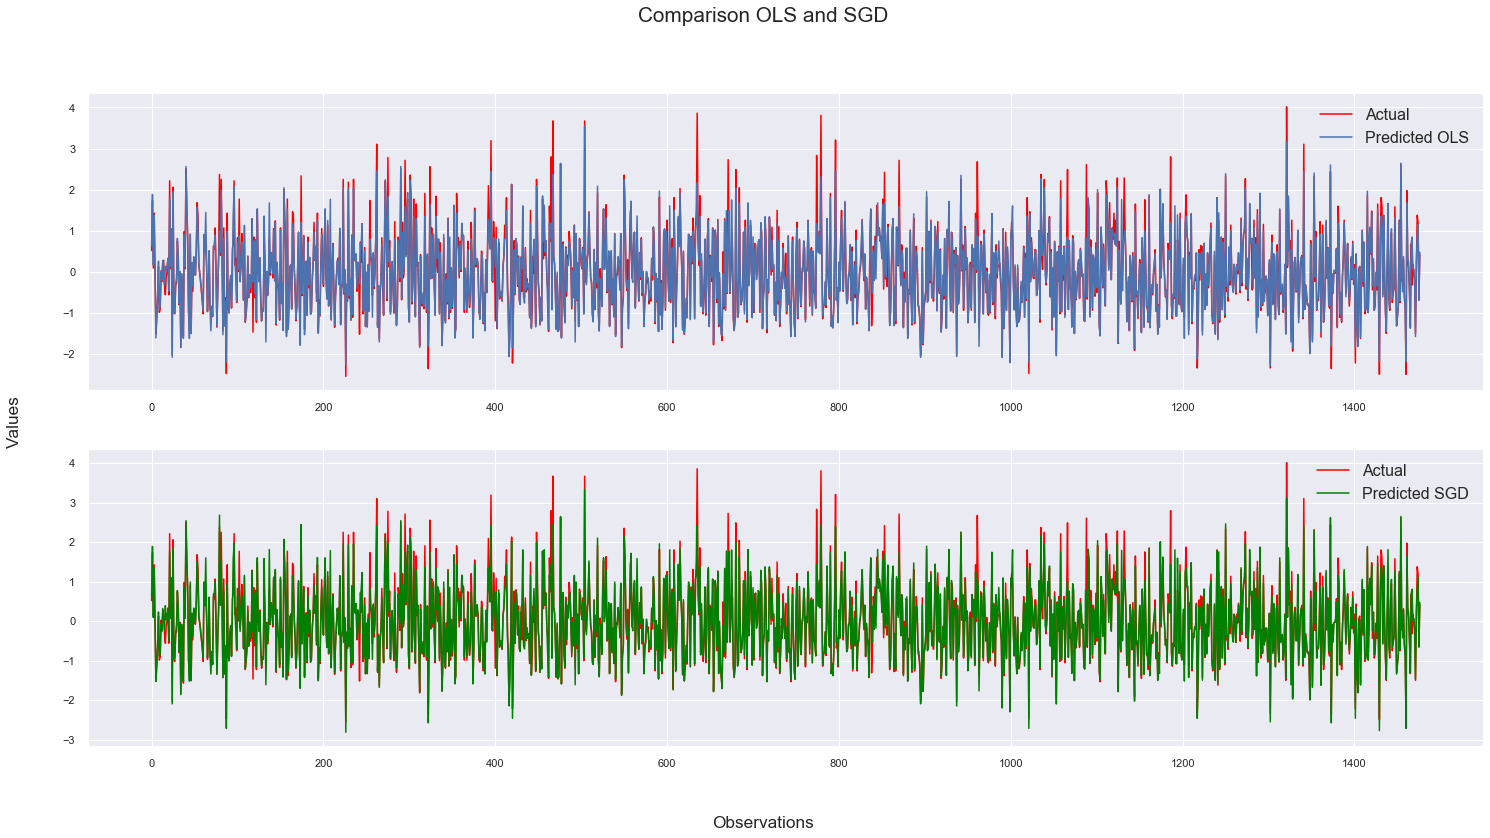

In [208]:
# Comparison with the real data: ols

fig, ((ax1, ax2)) = plt.subplots(2,1, figsize=(25, 12))
fig.suptitle('Comparison OLS and SGD', size = "xx-large")

ax1.plot(z_test, label='Actual', c = "red")
ax1.plot(zpred_lin, label='Predicted OLS')
ax1.legend(prop={'size': 16})

ax2.plot(z_test, label='Actual', c = "red")
ax2.plot(zpred_sgd2, label='Predicted SGD', c = "green")
ax2.legend(prop={'size': 16})

fig.text(0.5, 0.03, 'Observations', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Values', va='center', rotation='vertical', size = "x-large")

print('Mean Squared Error OLS:', (MSE(z_test, zpred_lin)).round(5))
print('Mean Squared Error SGD:', (MSE(z_test, zpred_sgd2)).round(5))

### RIDGE STOCHASTIC GRADIENT DESCENT

Mean Squared Error Ridge: 0.07323
Mean Squared Error SGD: 0.07585


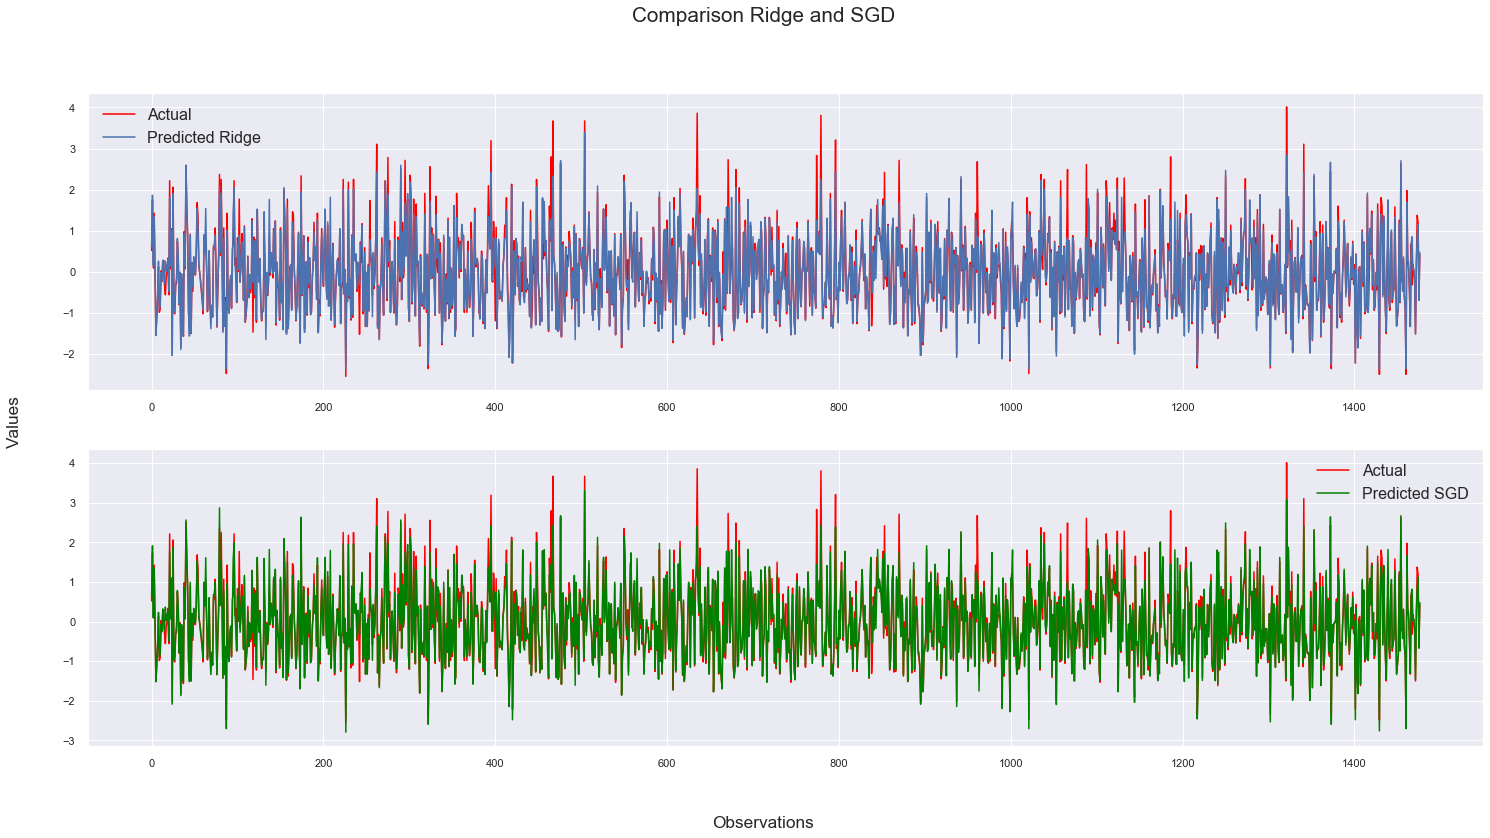

In [209]:
# Comparison with the real data: RIDGE

fig, ((ax1, ax2)) = plt.subplots(2,1, figsize=(25, 12))
fig.suptitle('Comparison Ridge and SGD', size = "xx-large")

ax1.plot(z_test, label='Actual', c = "red")
ax1.plot(zpred_ridge, label='Predicted Ridge')
ax1.legend(prop={'size': 16})

ax2.plot(z_test, label='Actual', c = "red")
ax2.plot(zpred_sgd8, label='Predicted SGD', c = "green")
ax2.legend(prop={'size': 16})

fig.text(0.5, 0.03, 'Observations', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Values', va='center', rotation='vertical', size = "x-large")

print('Mean Squared Error Ridge:', (MSE(z_test, zpred_ridge)).round(5))
print('Mean Squared Error SGD:', (MSE(z_test, zpred_sgd8)).round(5))

## EXERCISES 2-3
### NEURAL NETWORK FOR REGRESSION

Text(0.08, 0.5, '$\\eta$')

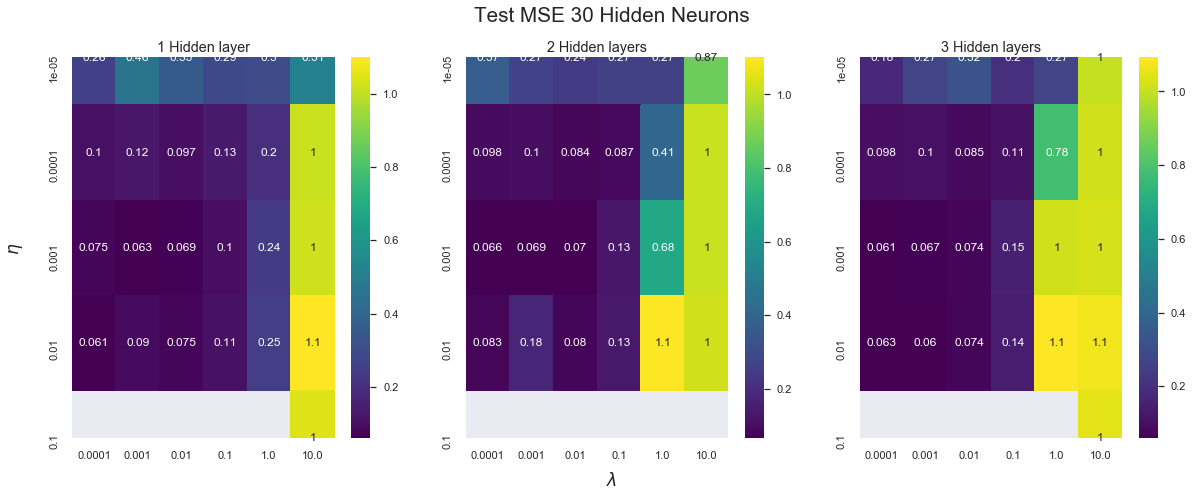

In [215]:
# Test MSE 30 Hidden Neuron Sigmoid - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test MSE 30 Hidden Neurons', size = "xx-large")
sns.heatmap(test_mse_nn1, annot=True, ax=ax1, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn2, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn3, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden layer", size = "large")
ax2.set_title("2 Hidden layers", size = "large")
ax3.set_title("3 Hidden layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Text(0.08, 0.5, '$\\eta$')

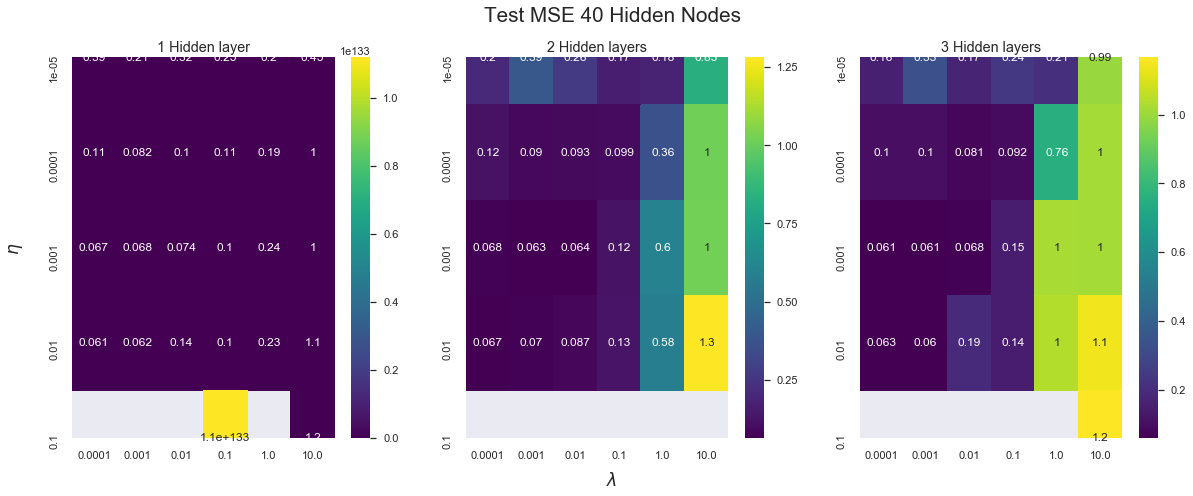

In [216]:
#Test MSE 40 Hidden Nodes Sigmoid - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test MSE 40 Hidden Nodes', size = "xx-large")
sns.heatmap(test_mse_nn4, annot=True, ax=ax1, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn5, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn6, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden layer", size = "large")
ax2.set_title("2 Hidden layers", size = "large")
ax3.set_title("3 Hidden layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Text(0.08, 0.5, '$\\eta$')

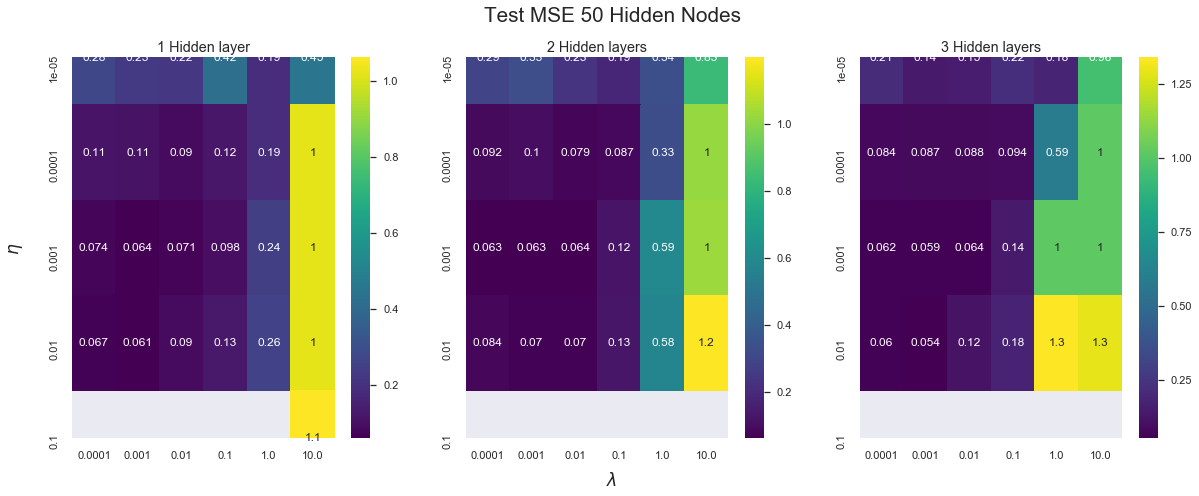

In [217]:
#Test MSE 50 Hidden Nodes Sigmoid - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test MSE 50 Hidden Nodes', size = "xx-large")
sns.heatmap(test_mse_nn7, annot=True, ax=ax1, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn8, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn9, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden layer", size = "large")
ax2.set_title("2 Hidden layers", size = "large")
ax3.set_title("3 Hidden layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Text(0.08, 0.5, '$\\eta$')

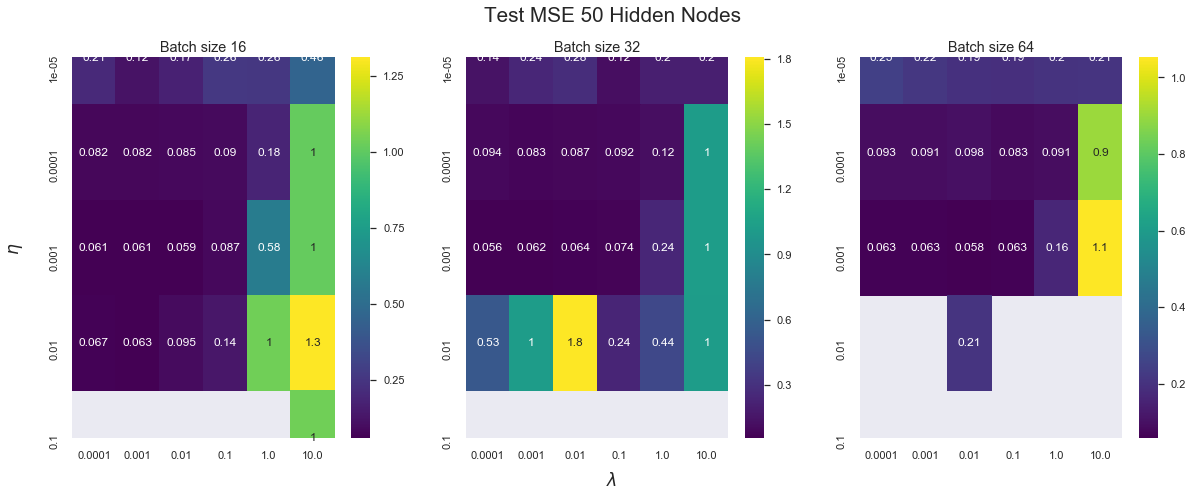

In [218]:
#Test MSE 50 Hidden Nodes Sigmoid - minibatches
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test MSE 50 Hidden Nodes', size = "xx-large")
sns.heatmap(test_mse_nn10, annot=True, ax=ax1, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn11, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn12, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("Batch size 16", size = "large")
ax2.set_title("Batch size 32", size = "large")
ax3.set_title("Batch size 64", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Text(0.08, 0.5, '$\\eta$')

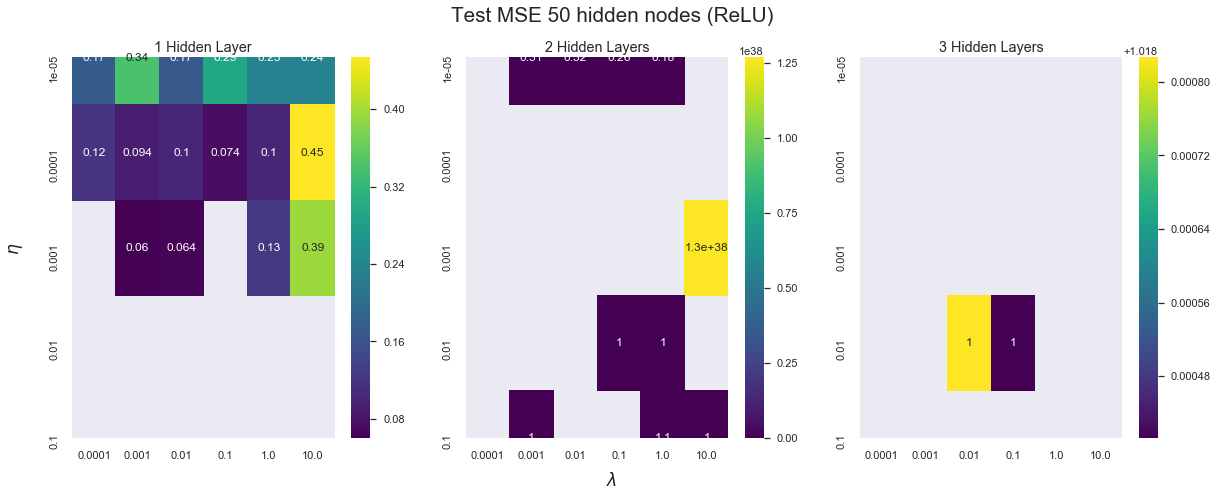

In [219]:
#Test MSE 50 Hidden Nodes RELU - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test MSE 50 hidden nodes (ReLU)', size = "xx-large")
sns.heatmap(test_mse_nn13, annot=True, ax=ax1, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn14, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn15, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden Layer", size = "large")
ax2.set_title("2 Hidden Layers", size = "large")
ax3.set_title("3 Hidden Layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Text(0.08, 0.5, '$\\eta$')

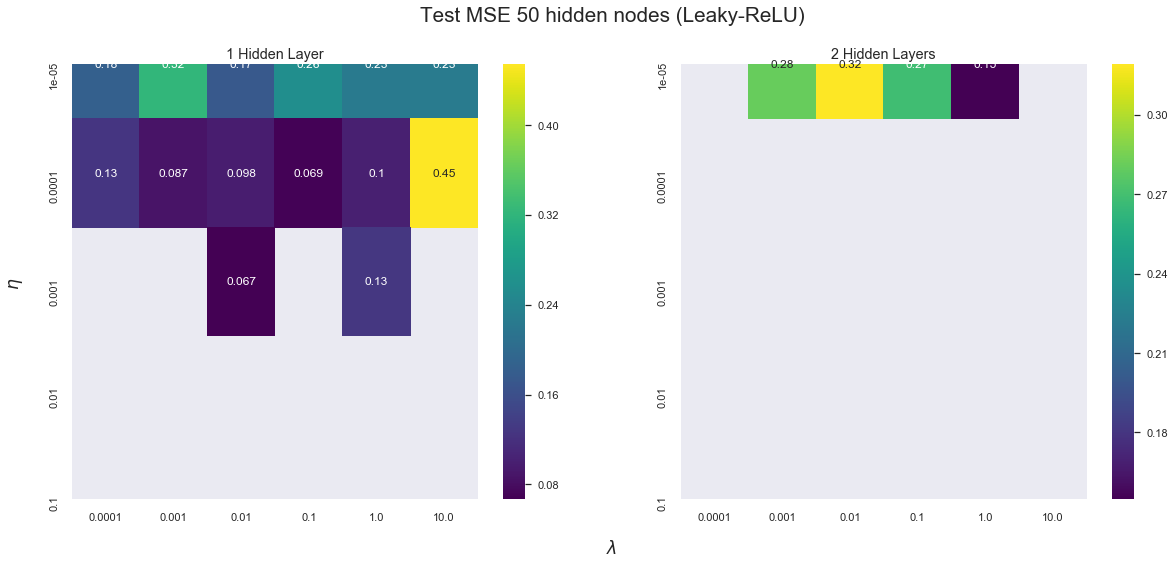

In [214]:
#Test MSE 50 Hidden Nodes leakyRELU - layers
sns.set()
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Test MSE 50 hidden nodes (Leaky-ReLU)', size = "xx-large")
sns.heatmap(test_mse_nn16, annot=True, ax=ax1, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn17, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden Layer", size = "large")
ax2.set_title("2 Hidden Layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Text(0.08, 0.5, '$\\eta$')

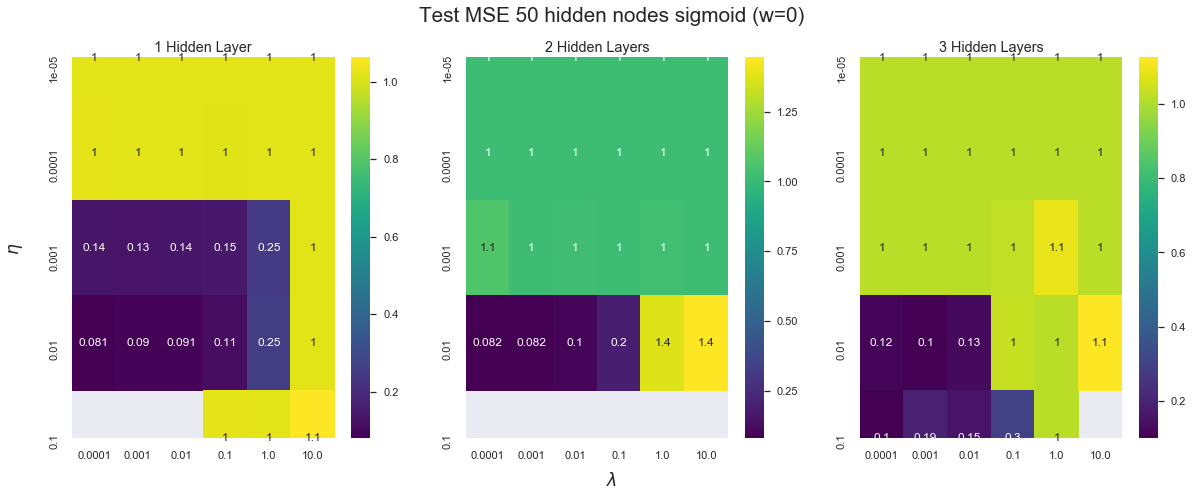

In [220]:
#Test MSE 50 Hidden Nodes Sigmoid (w=0) - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test MSE 50 hidden nodes sigmoid (w=0)', size = "xx-large")
sns.heatmap(test_mse_nn19, annot=True, ax=ax1, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn20, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn21, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden Layer", size = "large")
ax2.set_title("2 Hidden Layers", size = "large")
ax3.set_title("3 Hidden Layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Text(0.08, 0.5, '$\\eta$')

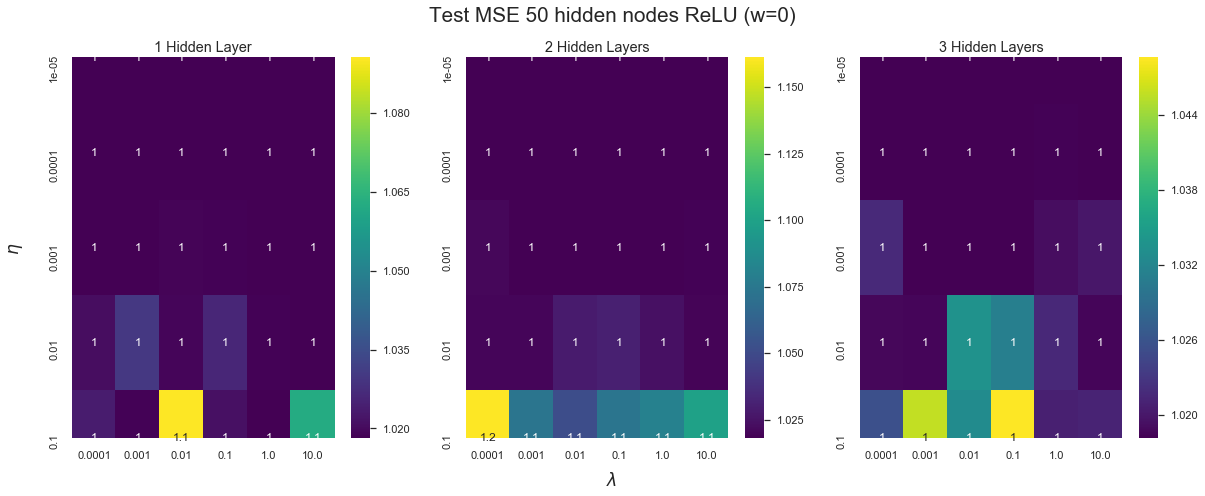

In [221]:
#Test MSE 50 Hidden Nodes RELU (w=0) - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test MSE 50 hidden nodes ReLU (w=0)', size = "xx-large")
sns.heatmap(test_mse_nn22, annot=True, ax=ax1, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn23, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn24, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden Layer", size = "large")
ax2.set_title("2 Hidden Layers", size = "large")
ax3.set_title("3 Hidden Layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Text(0.08, 0.5, '$\\eta$')

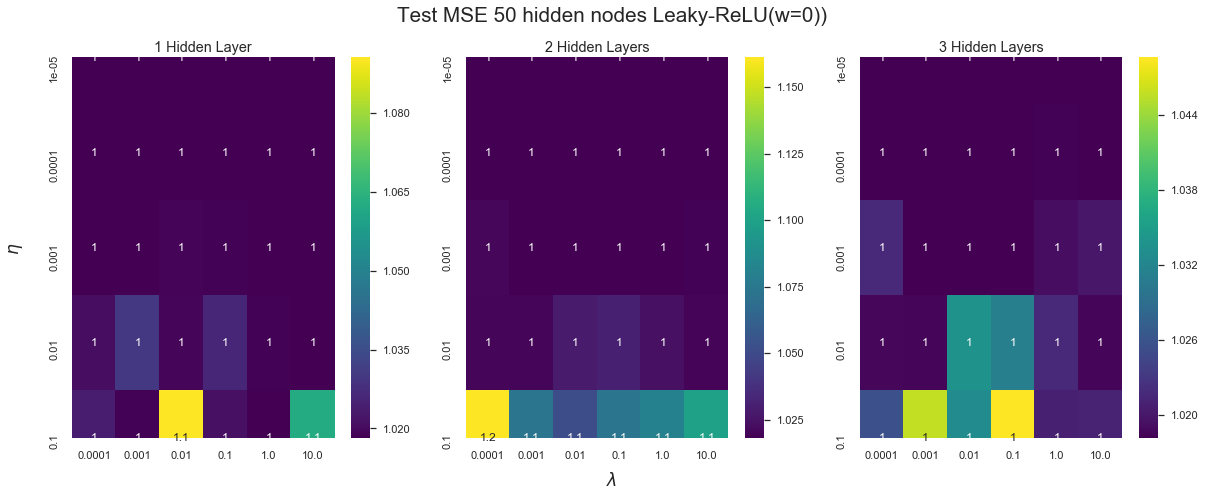

In [222]:
#Test MSE 50 Hidden Nodes leakyRELU (w=0) - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test MSE 50 hidden nodes Leaky-ReLU(w=0))', size = "xx-large")
sns.heatmap(test_mse_nn25, annot=True, ax=ax1, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn26, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_mse_nn27, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden Layer", size = "large")
ax2.set_title("2 Hidden Layers", size = "large")
ax3.set_title("3 Hidden Layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Mean Squared Error Ridge: 0.07323
Mean Squared Error NN: 0.05443


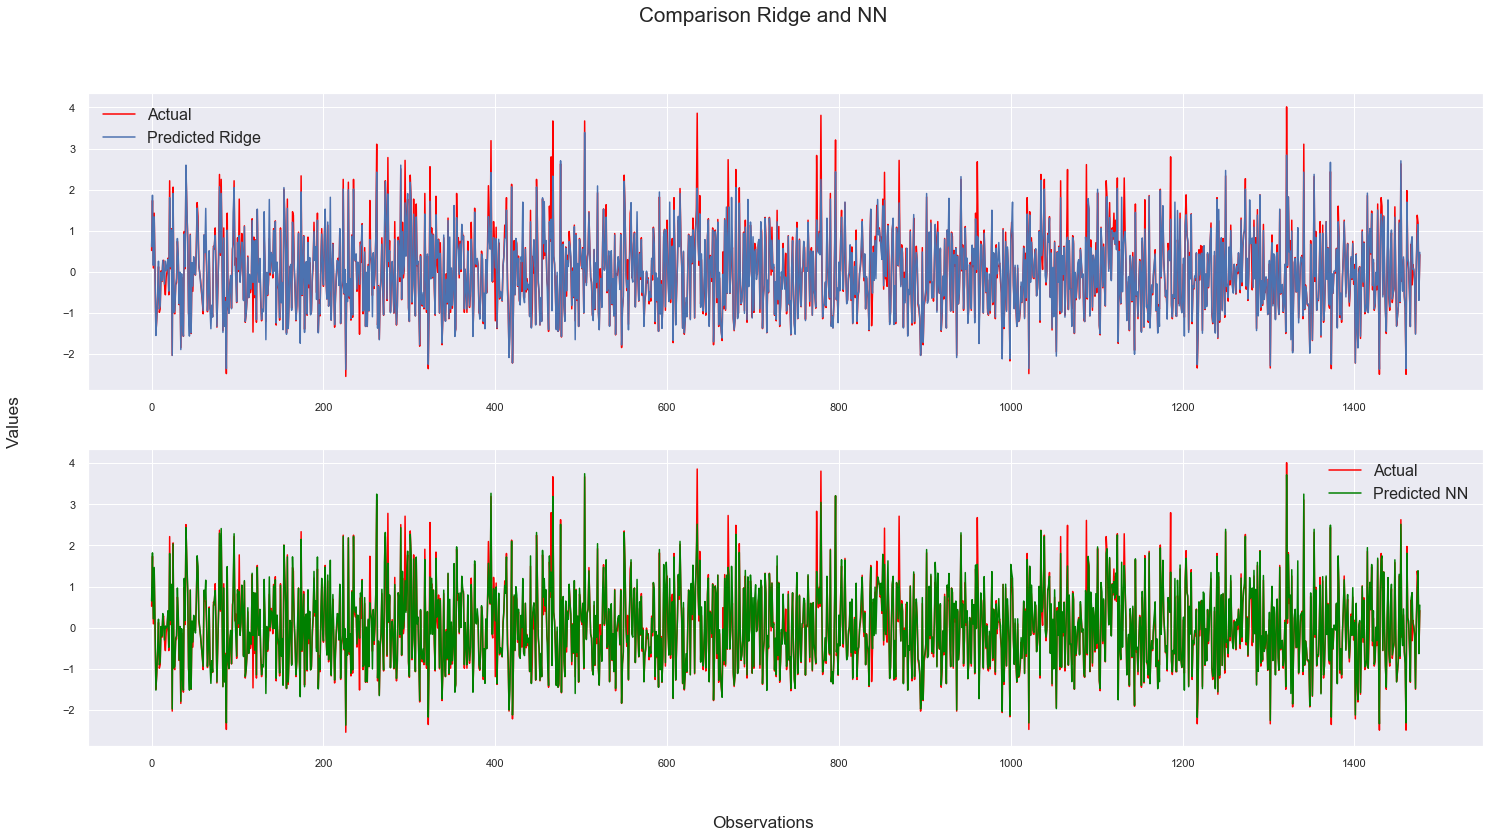

In [280]:
# Comparison with the real data: RIDGE vs NN 
fig, ((ax1, ax2)) = plt.subplots(2,1, figsize=(25, 12))
fig.suptitle('Comparison Ridge and NN', size = "xx-large")

ax1.plot(z_test, label='Actual', c = "red")
ax1.plot(zpred_ridge, label='Predicted Ridge')
ax1.legend(prop={'size': 16})

ax2.plot(z_test, label='Actual', c = "red")
ax2.plot(z_predict_nn9, label='Predicted NN', c = "green")
ax2.legend(prop={'size': 16})

fig.text(0.5, 0.03, 'Observations', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Values', va='center', rotation='vertical', size = "x-large")

print('Mean Squared Error Ridge:', (MSE(z_test, zpred_ridge)).round(5))
print('Mean Squared Error NN:', (MSE(z_test, z_predict_nn9)).round(5))

## EXERCISE 4
### NEURAL NETWORK FOR CLASSIFICATION

Text(0.08, 0.5, '$\\eta$')

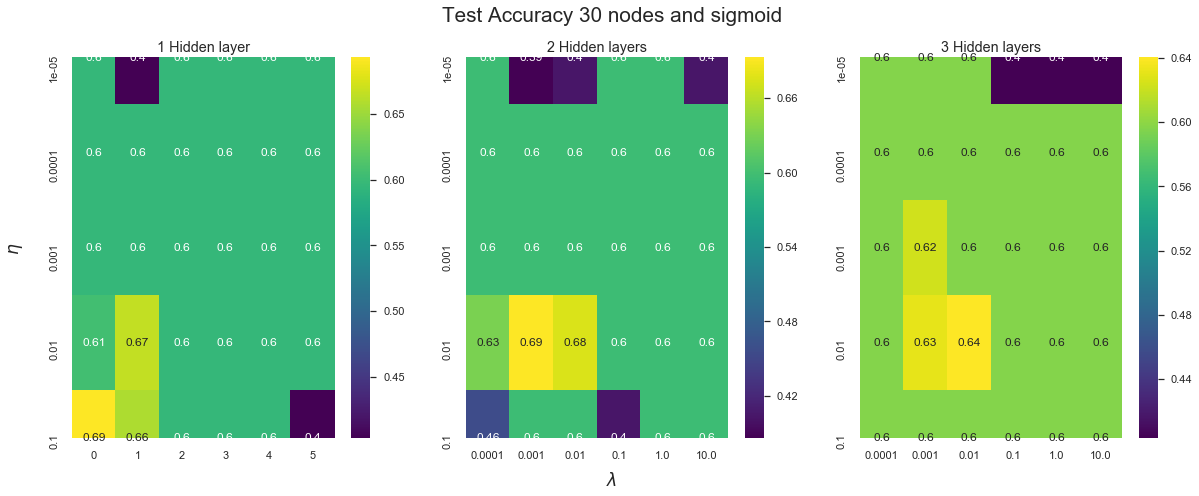

In [225]:
# 30 nodes and sigmoid - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test Accuracy 30 nodes and sigmoid', size = "xx-large")
sns.heatmap(test_accuracy_nnc1, annot=True, ax=ax1, cmap="viridis", yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc2, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc3, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden layer", size = "large")
ax2.set_title("2 Hidden layers", size = "large")
ax3.set_title("3 Hidden layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Accuracy 1 Layer: 69.3 %
Accuracy 2 Layers: 69.3 %
Accuracy 3 Layers: 64.04 %


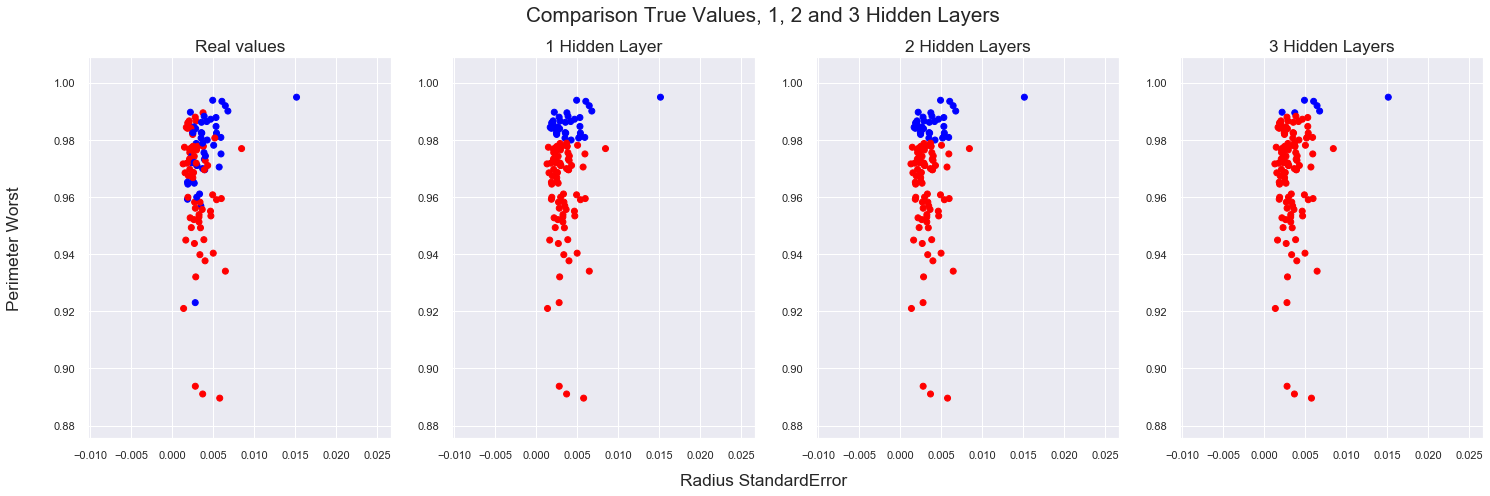

In [229]:
# Comparison with the real data: 30 nodes and sigmoid - layers
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize=(25, 7))
fig.suptitle('Comparison True Values, 1, 2 and 3 Hidden Layers', size = "xx-large")

colors = ['red', 'blue']
levels = [0, 1]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')         
          
ax1.scatter(Xc_test[:,1], Xc_test[:,4], c = y_test.ravel(), cmap=cmap, norm=norm)
ax2.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc1.ravel(), cmap=cmap, norm=norm)
ax3.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc2.ravel(), cmap=cmap, norm=norm)
ax4.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc3.ravel(), cmap=cmap, norm=norm)

ax1.set_title("Real values", size = "x-large")
ax2.set_title("1 Hidden Layer", size = "x-large")
ax3.set_title("2 Hidden Layers", size = "x-large")
ax4.set_title("3 Hidden Layers", size = "x-large")

fig.text(0.5, 0.03, 'Radius StandardError', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Perimeter Worst', va='center', rotation='vertical', size = "x-large")

print('Accuracy 1 Layer:', (accuracy_score(y_test, y_predict_nnc1)*100).round(2), "%")
print('Accuracy 2 Layers:', (accuracy_score(y_test, y_predict_nnc2)*100).round(2), "%")
print('Accuracy 3 Layers:', (accuracy_score(y_test, y_predict_nnc3)*100).round(2), "%")

Text(0.08, 0.5, '$\\eta$')

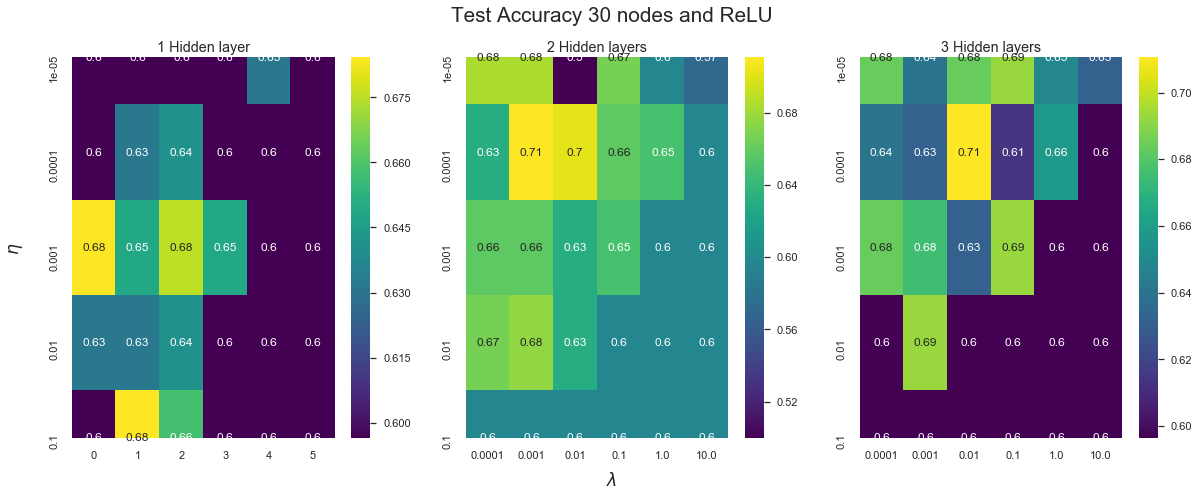

In [227]:
# 30 nodes and ReLU - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test Accuracy 30 nodes and ReLU', size = "xx-large")
sns.heatmap(test_accuracy_nnc4, annot=True, ax=ax1, cmap="viridis", yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc5, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc6, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden layer", size = "large")
ax2.set_title("2 Hidden layers", size = "large")
ax3.set_title("3 Hidden layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Accuracy 1 Layer: 68.42 %
Accuracy 2 Layers: 71.05 %
Accuracy 3 Layers: 71.05 %


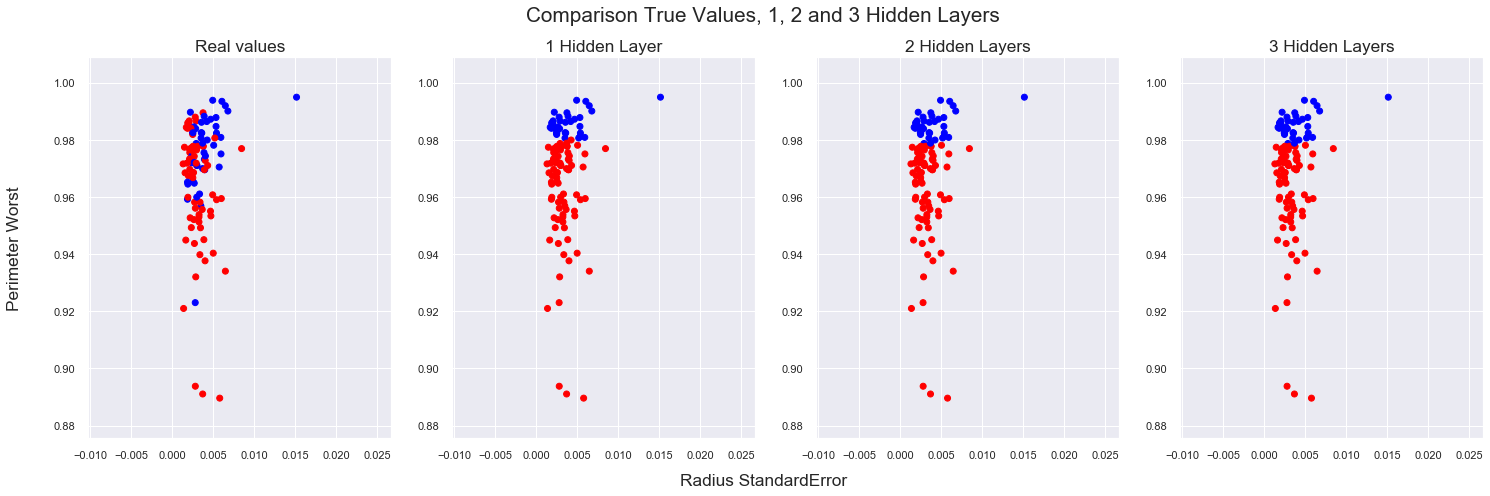

In [228]:
# Comparison with the real data: 30 nodes and ReLU - layers
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize=(25, 7))
fig.suptitle('Comparison True Values, 1, 2 and 3 Hidden Layers', size = "xx-large")

colors = ['red', 'blue']
levels = [0, 1]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')         
          
ax1.scatter(Xc_test[:,1], Xc_test[:,4], c = y_test.ravel(), cmap=cmap, norm=norm)
ax2.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc4.ravel(), cmap=cmap, norm=norm)
ax3.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc5.ravel(), cmap=cmap, norm=norm)
ax4.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc6.ravel(), cmap=cmap, norm=norm)

ax1.set_title("Real values", size = "x-large")
ax2.set_title("1 Hidden Layer", size = "x-large")
ax3.set_title("2 Hidden Layers", size = "x-large")
ax4.set_title("3 Hidden Layers", size = "x-large")

fig.text(0.5, 0.03, 'Radius StandardError', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Perimeter Worst', va='center', rotation='vertical', size = "x-large")

print('Accuracy 1 Layer:', (accuracy_score(y_test, y_predict_nnc4)*100).round(2), "%")
print('Accuracy 2 Layers:', (accuracy_score(y_test, y_predict_nnc5)*100).round(2), "%")
print('Accuracy 3 Layers:', (accuracy_score(y_test, y_predict_nnc6)*100).round(2), "%")

Text(0.08, 0.5, '$\\eta$')

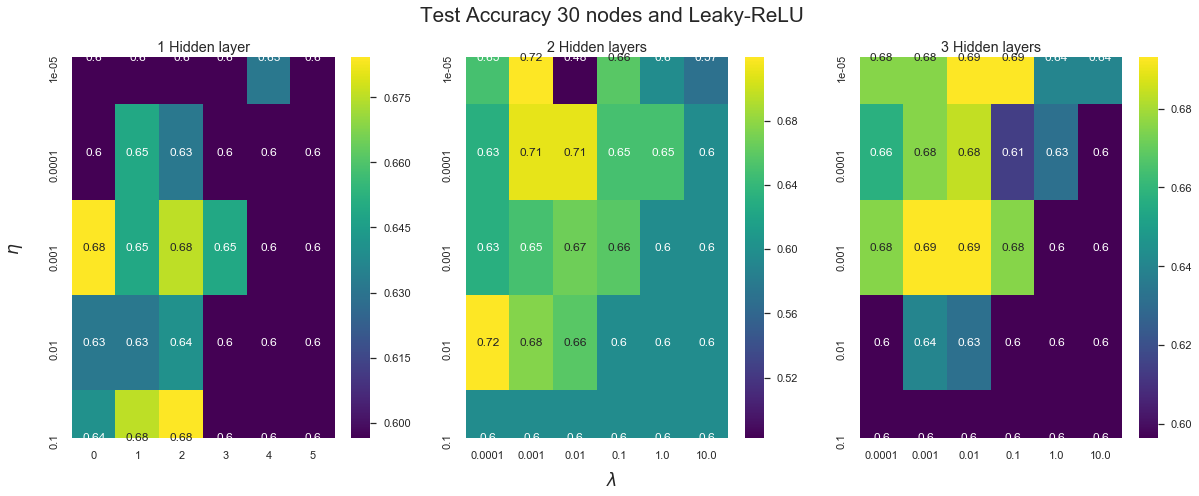

In [231]:
#30 nodes and leaky-ReLU - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test Accuracy 30 nodes and Leaky-ReLU', size = "xx-large")
sns.heatmap(test_accuracy_nnc7, annot=True, ax=ax1, cmap="viridis", yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc8, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc9, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden layer", size = "large")
ax2.set_title("2 Hidden layers", size = "large")
ax3.set_title("3 Hidden layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Accuracy 1 Layer: 68.42 %
Accuracy 2 Layers: 71.93 %
Accuracy 3 Layers: 69.3 %


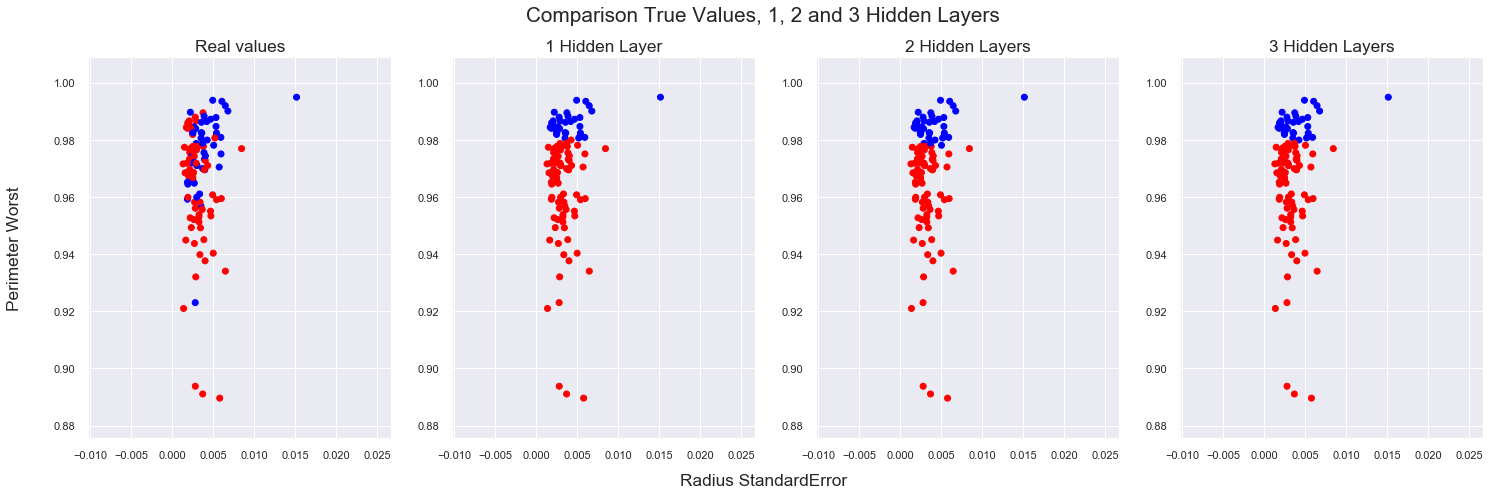

In [235]:
# Comparison with the real data: 30 nodes and leakyReLU - layers
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize=(25, 7))
fig.suptitle('Comparison True Values, 1, 2 and 3 Hidden Layers', size = "xx-large")

colors = ['red', 'blue']
levels = [0, 1]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')         
          
ax1.scatter(Xc_test[:,1], Xc_test[:,4], c = y_test.ravel(), cmap=cmap, norm=norm)
ax2.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc7.ravel(), cmap=cmap, norm=norm)
ax3.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc8.ravel(), cmap=cmap, norm=norm)
ax4.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc9.ravel(), cmap=cmap, norm=norm)

ax1.set_title("Real values", size = "x-large")
ax2.set_title("1 Hidden Layer", size = "x-large")
ax3.set_title("2 Hidden Layers", size = "x-large")
ax4.set_title("3 Hidden Layers", size = "x-large")

fig.text(0.5, 0.03, 'Radius StandardError', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Perimeter Worst', va='center', rotation='vertical', size = "x-large")

print('Accuracy 1 Layer:', (accuracy_score(y_test, y_predict_nnc7)*100).round(2), "%")
print('Accuracy 2 Layers:', (accuracy_score(y_test, y_predict_nnc8)*100).round(2), "%")
print('Accuracy 3 Layers:', (accuracy_score(y_test, y_predict_nnc9)*100).round(2), "%")

Text(0.08, 0.5, '$\\eta$')

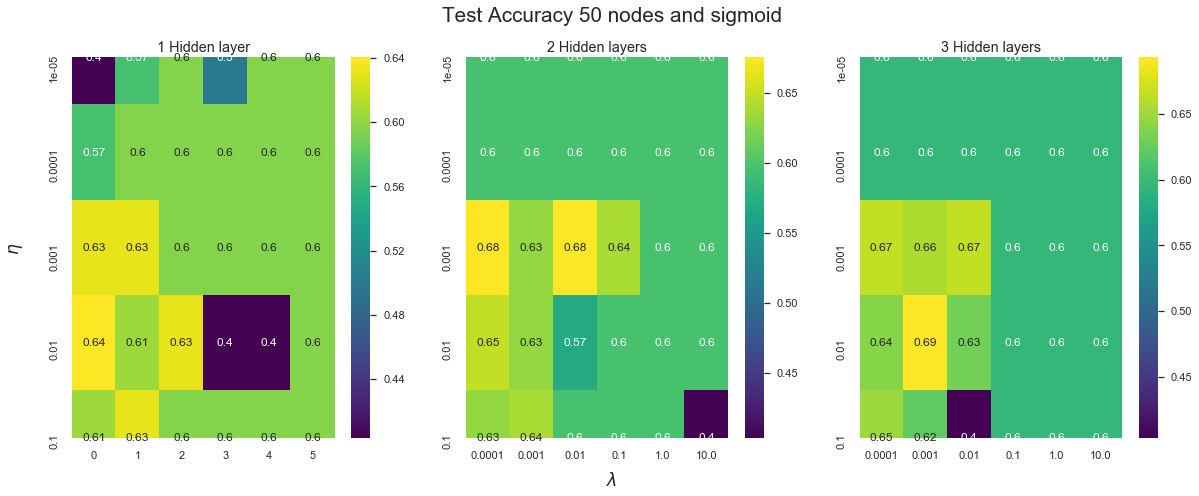

In [232]:
# 50 nodes and sigmoid - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test Accuracy 50 nodes and sigmoid', size = "xx-large")
sns.heatmap(test_accuracy_nnc10, annot=True, ax=ax1, cmap="viridis", yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc11, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc12, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden layer", size = "large")
ax2.set_title("2 Hidden layers", size = "large")
ax3.set_title("3 Hidden layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Accuracy 1 Layer: 64.04 %
Accuracy 2 Layers: 67.54 %
Accuracy 3 Layers: 69.3 %


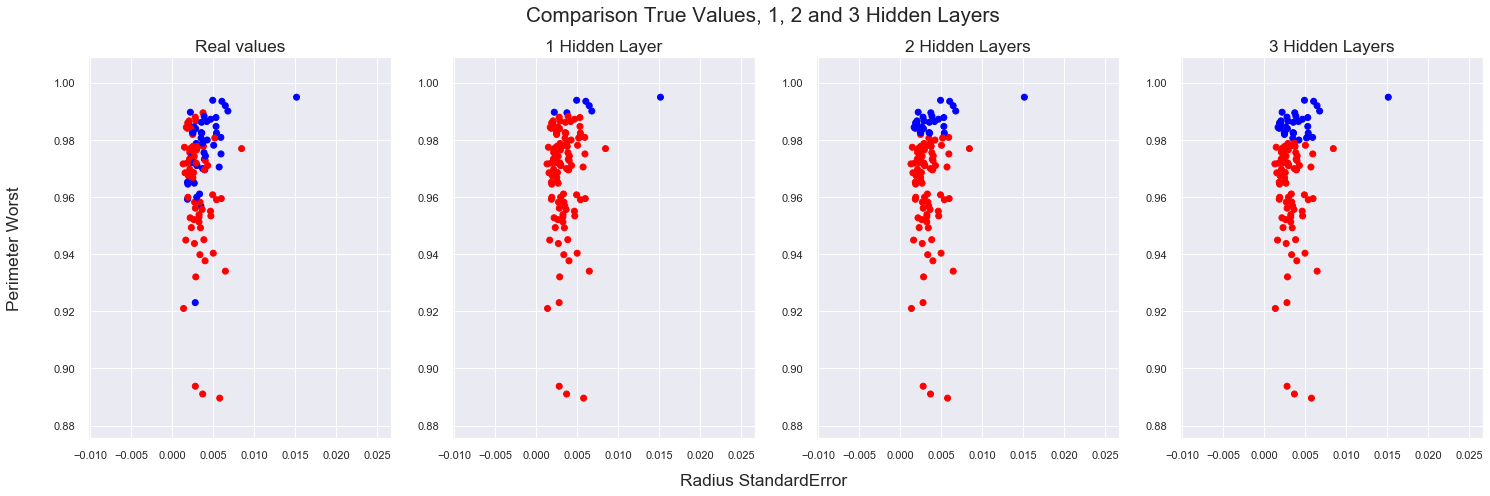

In [236]:
# Comparison with the real data: 50 nodes and sigmoid - layers
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize=(25, 7))
fig.suptitle('Comparison True Values, 1, 2 and 3 Hidden Layers', size = "xx-large")

colors = ['red', 'blue']
levels = [0, 1]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')         
          
ax1.scatter(Xc_test[:,1], Xc_test[:,4], c = y_test.ravel(), cmap=cmap, norm=norm)
ax2.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc10.ravel(), cmap=cmap, norm=norm)
ax3.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc11.ravel(), cmap=cmap, norm=norm)
ax4.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc12.ravel(), cmap=cmap, norm=norm)

ax1.set_title("Real values", size = "x-large")
ax2.set_title("1 Hidden Layer", size = "x-large")
ax3.set_title("2 Hidden Layers", size = "x-large")
ax4.set_title("3 Hidden Layers", size = "x-large")

fig.text(0.5, 0.03, 'Radius StandardError', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Perimeter Worst', va='center', rotation='vertical', size = "x-large")

print('Accuracy 1 Layer:', (accuracy_score(y_test, y_predict_nnc10)*100).round(2), "%")
print('Accuracy 2 Layers:', (accuracy_score(y_test, y_predict_nnc11)*100).round(2), "%")
print('Accuracy 3 Layers:', (accuracy_score(y_test, y_predict_nnc12)*100).round(2), "%")

Text(0.08, 0.5, '$\\eta$')

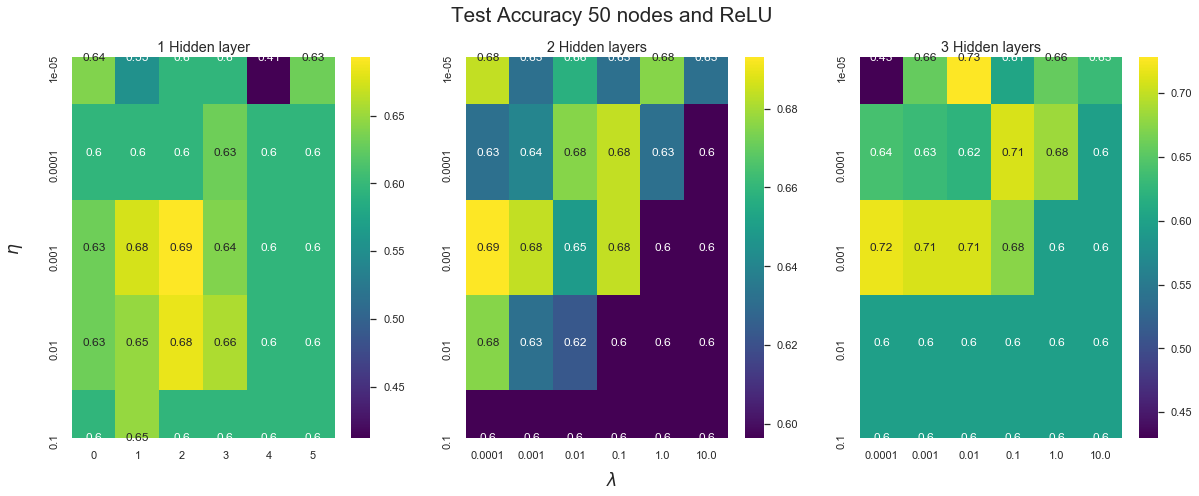

In [233]:
# 50 nodes and ReLU - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test Accuracy 50 nodes and ReLU', size = "xx-large")
sns.heatmap(test_accuracy_nnc13, annot=True, ax=ax1, cmap="viridis", yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc14, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc15, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden layer", size = "large")
ax2.set_title("2 Hidden layers", size = "large")
ax3.set_title("3 Hidden layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Accuracy 1 Layer: 69.3 %
Accuracy 2 Layers: 69.3 %
Accuracy 3 Layers: 72.81 %


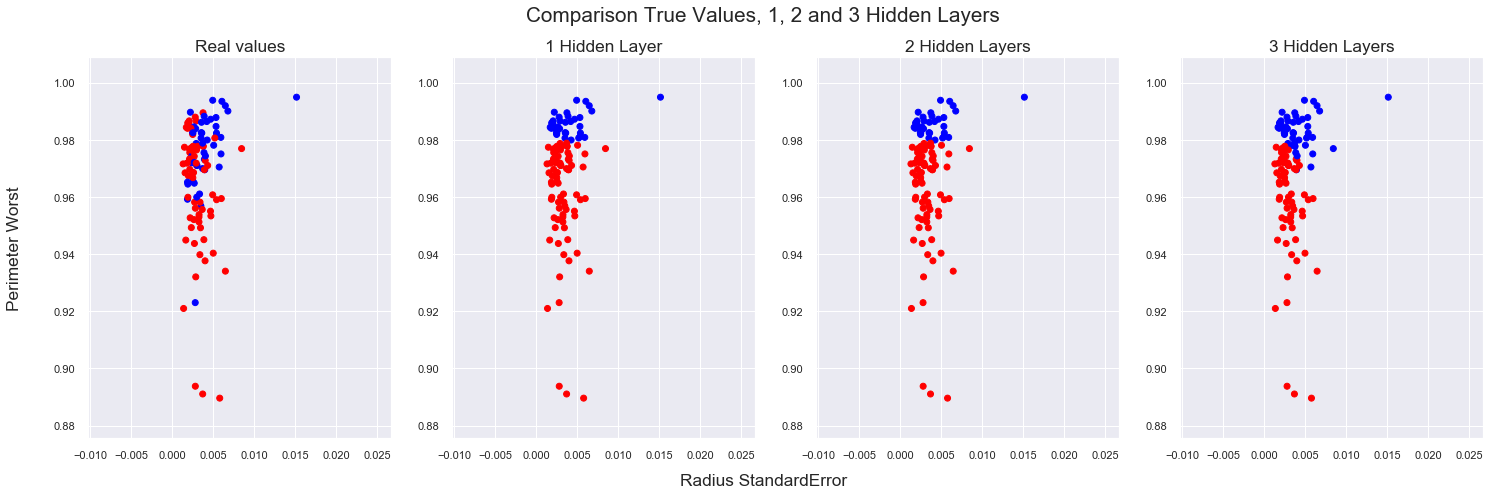

In [237]:
# Comparison with the real data: 50 nodes and ReLU- layers
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize=(25, 7))
fig.suptitle('Comparison True Values, 1, 2 and 3 Hidden Layers', size = "xx-large")

colors = ['red', 'blue']
levels = [0, 1]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')         
          
ax1.scatter(Xc_test[:,1], Xc_test[:,4], c = y_test.ravel(), cmap=cmap, norm=norm)
ax2.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc13.ravel(), cmap=cmap, norm=norm)
ax3.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc14.ravel(), cmap=cmap, norm=norm)
ax4.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc15.ravel(), cmap=cmap, norm=norm)

ax1.set_title("Real values", size = "x-large")
ax2.set_title("1 Hidden Layer", size = "x-large")
ax3.set_title("2 Hidden Layers", size = "x-large")
ax4.set_title("3 Hidden Layers", size = "x-large")

fig.text(0.5, 0.03, 'Radius StandardError', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Perimeter Worst', va='center', rotation='vertical', size = "x-large")

print('Accuracy 1 Layer:', (accuracy_score(y_test, y_predict_nnc13)*100).round(2), "%")
print('Accuracy 2 Layers:', (accuracy_score(y_test, y_predict_nnc14)*100).round(2), "%")
print('Accuracy 3 Layers:', (accuracy_score(y_test, y_predict_nnc15)*100).round(2), "%")

Text(0.08, 0.5, '$\\eta$')

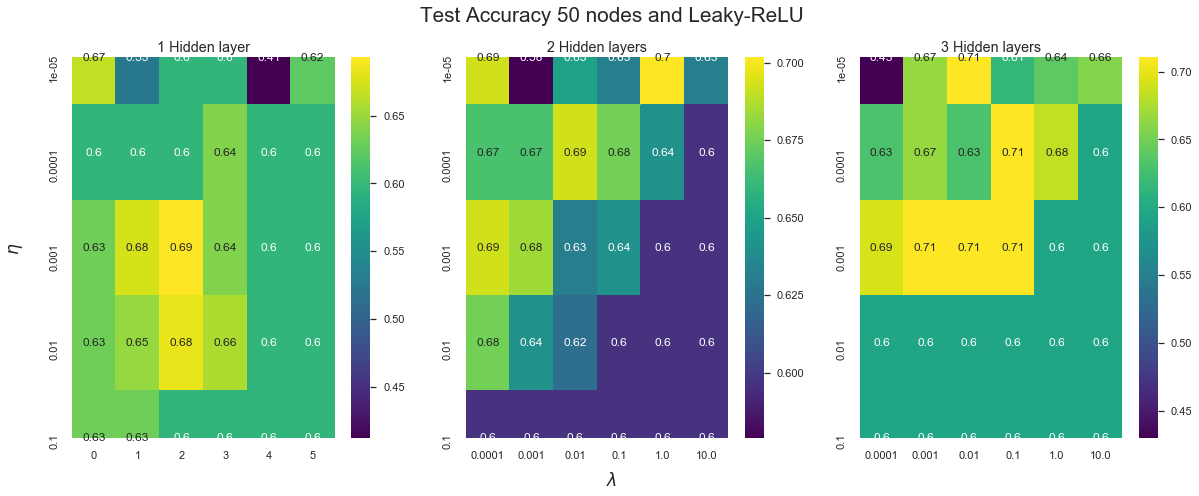

In [234]:
# 50 nodes and leaky-ReLU - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test Accuracy 50 nodes and Leaky-ReLU', size = "xx-large")
sns.heatmap(test_accuracy_nnc16, annot=True, ax=ax1, cmap="viridis", yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc17, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc18, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden layer", size = "large")
ax2.set_title("2 Hidden layers", size = "large")
ax3.set_title("3 Hidden layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Accuracy 1 Layer: 69.3 %
Accuracy 2 Layers: 70.18 %
Accuracy 3 Layers: 71.05 %


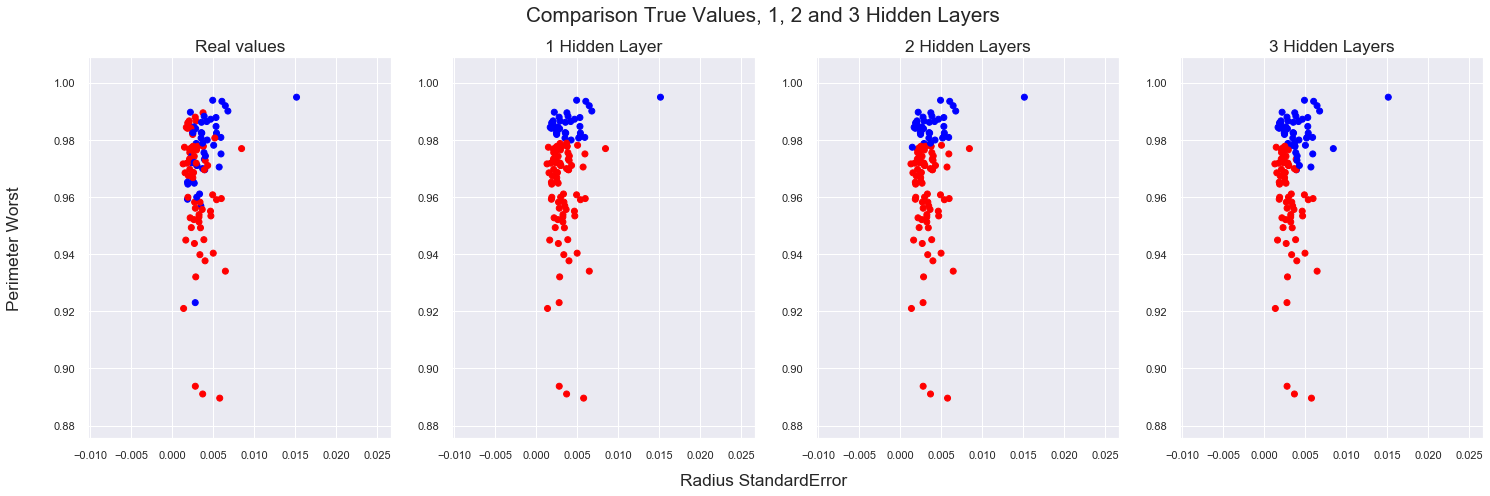

In [238]:
# Comparison with the real data: 50 nodes and leakyReLU- layers
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize=(25, 7))
fig.suptitle('Comparison True Values, 1, 2 and 3 Hidden Layers', size = "xx-large")

colors = ['red', 'blue']
levels = [0, 1]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')         
          
ax1.scatter(Xc_test[:,1], Xc_test[:,4], c = y_test.ravel(), cmap=cmap, norm=norm)
ax2.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc16.ravel(), cmap=cmap, norm=norm)
ax3.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc17.ravel(), cmap=cmap, norm=norm)
ax4.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc18.ravel(), cmap=cmap, norm=norm)

ax1.set_title("Real values", size = "x-large")
ax2.set_title("1 Hidden Layer", size = "x-large")
ax3.set_title("2 Hidden Layers", size = "x-large")
ax4.set_title("3 Hidden Layers", size = "x-large")

fig.text(0.5, 0.03, 'Radius StandardError', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Perimeter Worst', va='center', rotation='vertical', size = "x-large")

print('Accuracy 1 Layer:', (accuracy_score(y_test, y_predict_nnc16)*100).round(2), "%")
print('Accuracy 2 Layers:', (accuracy_score(y_test, y_predict_nnc17)*100).round(2), "%")
print('Accuracy 3 Layers:', (accuracy_score(y_test, y_predict_nnc18)*100).round(2), "%")

## EXERCISE 5
### LOGISTIC REGRESSION

Text(0.08, 0.5, '$\\eta$')

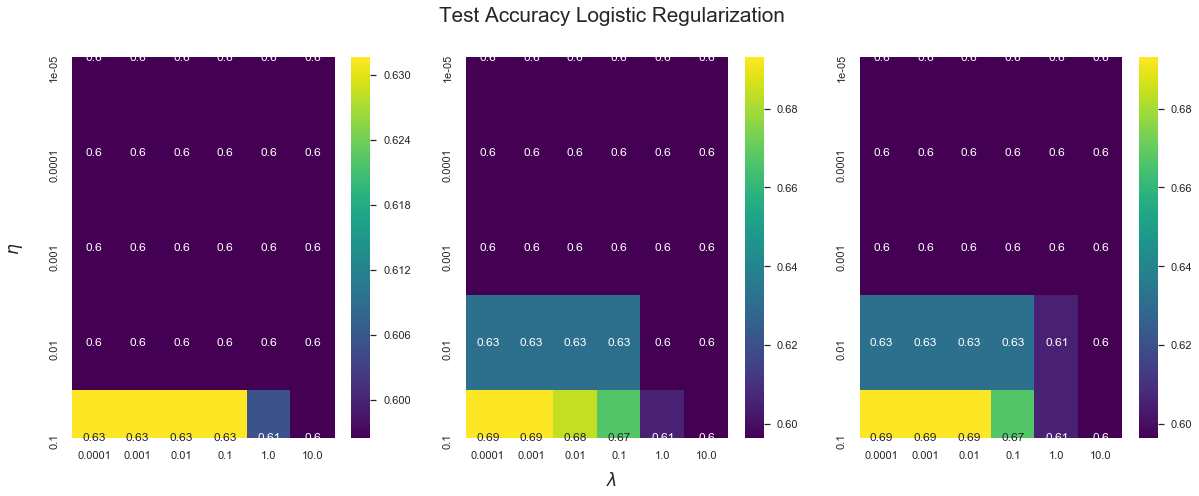

In [252]:
#  Intercept and L2 regularization - iterations
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test Accuracy Logistic Regularization', size = "xx-large")
sns.heatmap(test_accuracy_lo1, annot=True, ax=ax1, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_accuracy_lo2, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_accuracy_lo3, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Accuracy 1 Layer: 63.16 %
Accuracy 2 Layers: 69.3 %
Accuracy 3 Layers: 69.3 %


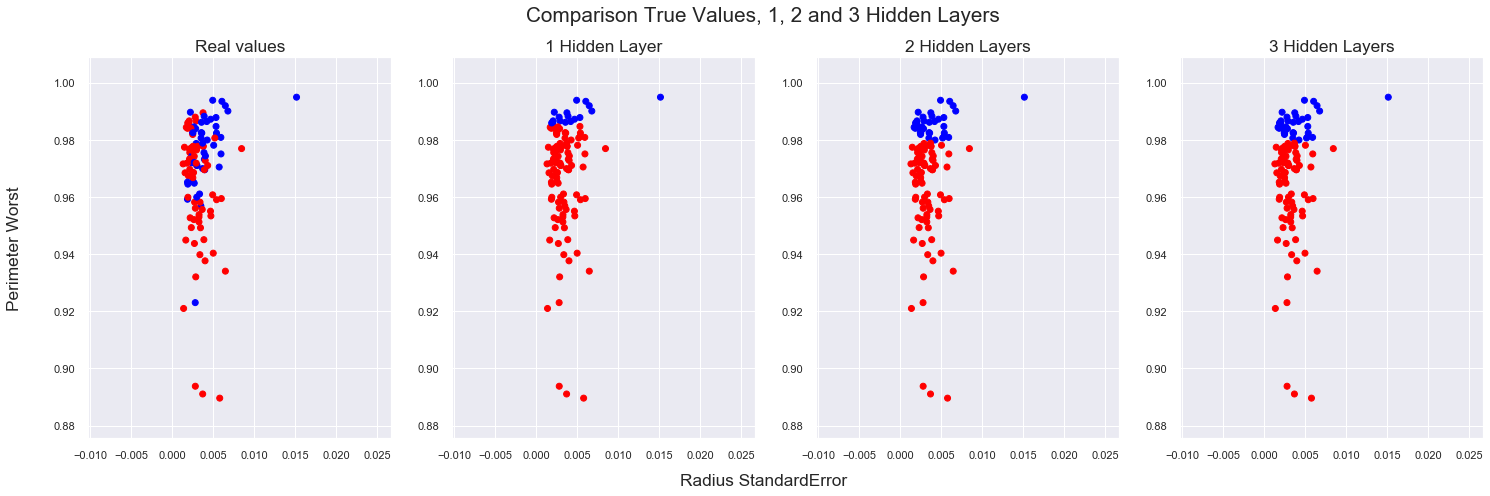

In [253]:
# Comparison with the real data: Intercept and L2 regularization - iterations 
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize=(25, 7))
fig.suptitle('Comparison True Values, 1, 2 and 3 Hidden Layers', size = "xx-large")

colors = ['red', 'blue']
levels = [0, 1]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')         
          
ax1.scatter(Xc_test[:,1], Xc_test[:,4], c = y_test.ravel(), cmap=cmap, norm=norm)
ax2.scatter(Xc_test[:,1], Xc_test[:,4], c = y_pred_lo1.ravel(), cmap=cmap, norm=norm)
ax3.scatter(Xc_test[:,1], Xc_test[:,4], c = y_pred_lo2.ravel(), cmap=cmap, norm=norm)
ax4.scatter(Xc_test[:,1], Xc_test[:,4], c = y_pred_lo3.ravel(), cmap=cmap, norm=norm)

ax1.set_title("Real values", size = "x-large")
ax2.set_title("1 Hidden Layer", size = "x-large")
ax3.set_title("2 Hidden Layers", size = "x-large")
ax4.set_title("3 Hidden Layers", size = "x-large")

fig.text(0.5, 0.03, 'Radius StandardError', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Perimeter Worst', va='center', rotation='vertical', size = "x-large")

print('Accuracy 1 Layer:', (accuracy_score(y_test, y_pred_lo1)*100).round(2), "%")
print('Accuracy 2 Layers:', (accuracy_score(y_test,y_pred_lo2)*100).round(2), "%")
print('Accuracy 3 Layers:', (accuracy_score(y_test,y_pred_lo3)*100).round(2), "%")

### Comparison Neural Network and Logistic

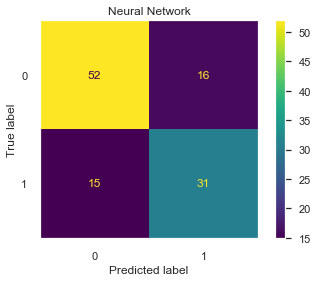

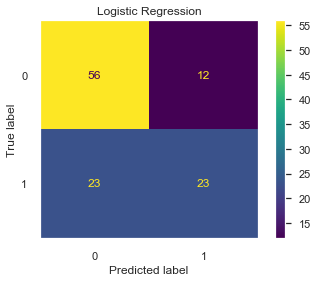

In [277]:
## neural network best model
cm1 = confusion_matrix(y_test, y_predict_nnc15)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot()
disp1.ax_.set(title = "Neural Network")
plt.grid(False)
plt.show()

cm2 = confusion_matrix(y_test, y_pred_lo9)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()
disp2.ax_.set(title = "Logistic Regression")
plt.grid(False)
plt.show()

Accuracy Logistic: 69.3 %
Accuracy NN: 72.81 %


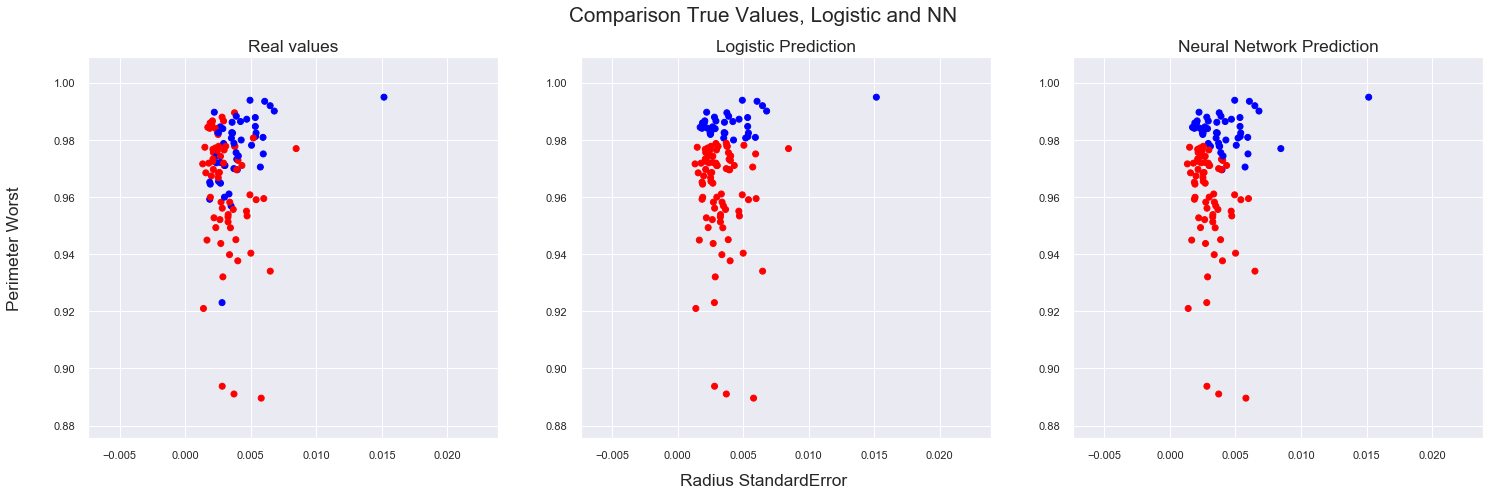

In [278]:
# Comparison with the real data
y_test = y_test.ravel()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(25, 7))
fig.suptitle('Comparison True Values, Logistic and NN', size = "xx-large")

colors = ['red', 'blue']
levels = [0, 1]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')         
          
ax1.scatter(Xc_test[:,1], Xc_test[:,4], c = y_test, cmap=cmap, norm=norm)
ax2.scatter(Xc_test[:,1], Xc_test[:,4], c = y_pred_lo9, cmap=cmap, norm=norm)
ax3.scatter(Xc_test[:,1], Xc_test[:,4], c = y_predict_nnc15, cmap=cmap, norm=norm)

ax1.set_title("Real values", size = "x-large")
ax2.set_title("Logistic Prediction", size = "x-large")
ax3.set_title("Neural Network Prediction", size = "x-large")

fig.text(0.5, 0.03, 'Radius StandardError', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Perimeter Worst', va='center', rotation='vertical', size = "x-large")

print('Accuracy Logistic:', (accuracy_score(y_test, y_pred_lo9)*100).round(2), "%")
print('Accuracy NN:', (accuracy_score(y_test, y_predict_nnc15)*100).round(2), "%")